In [1]:
!pip install scikit-multilearn
!pip install fasttext
!pip install scikit-multilearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296185 sha256=daa8c848f1981969b1a9f4b231f1566486df544b4c4cbb863ac3838268dd0110
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [2]:
import pandas as pd
import numpy as np
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, hamming_loss, f1_score, multilabel_confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
import fasttext
from transformers import BertTokenizer
import gensim
import gensim.downloader

In [3]:
import pandas as pd
import numpy as np
from skmultilearn.problem_transform import LabelPowerset
from sklearn.preprocessing import MultiLabelBinarizer
import gensim
from sklearn.svm import LinearSVC
import pickle

#glove_vectors = gensim.models.KeyedVectors.load_word2vec_format('glove.6B.100d.txt',binary=False, no_header=True)

dataset = pd.read_excel("Synthetic User Stories.xlsx")

labels = pd.read_excel("Keyword labelled.xlsx", header=None)
labels[2] = labels[2].apply(lambda x: x.lower())
labels

0   1                          2                        3   \
0     classification NaN  abstractive summarization       Data summarization   
1         regression NaN      action model learning                    Other   
2            ranking NaN        activation function  Representation learning   
3           matching NaN    active learning setting           Classification   
4    risk assessment NaN                   adaboost           Classification   
..               ...  ..                        ...                      ...   
362              NaN NaN          word segmentation      Machine translation   
363              NaN NaN            word similarity           Classification   
364              NaN NaN  word-sense disambiguation           Classification   
365              NaN NaN                   word2vec           Classification   
366              NaN NaN                    wordnet  Representation learning   

                     4                  5                  6   \
0                   NaN                NaN                NaN   
1                   NaN                NaN                NaN   
2        Classification         Regression  Anomaly detection   
3            Regression  Anomaly detection  Entity resolution   
4            Regression                NaN                NaN   
..                  ...                ...                ...   
362  Speech recognition                NaN                NaN   
363             Ranking           Matching         Clustering   
364             Ranking           Matching         Clustering   
365             Ranking           Matching         Clustering   
366          Clustering           Matching  Anomaly detection   

                     7                                  8   \
0                   NaN                                NaN   
1                   NaN                                NaN   
2            Clustering   Spatio-temporal process learning   
3    Sentiment analysis  Bias detection in word embeddings   
4                   NaN                                NaN   
..                  ...                                ...   
362                 NaN                                NaN   
363   Anomaly detection                 Sentiment analysis   
364   Anomaly detection                 Sentiment analysis   
365   Anomaly detection                 Sentiment analysis   
366    Subset selection                       Graph mining   

                                    9   ...   18   19   20   21   22   23  \
0                                  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
1                                  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
2                      Graph diffusion  ...  NaN  NaN  NaN  NaN  NaN  NaN   
3    Bias detection in language models  ...  NaN  NaN  NaN  NaN  NaN  NaN   
4                                  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
..                                 ...  ...  ...  ...  ...  ...  ...  ...   
362                                NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   
363                  Entity resolution  ...  NaN  NaN  NaN  NaN  NaN  NaN   
364                  Entity resolution  ...  NaN  NaN  NaN  NaN  NaN  NaN   
365                  Entity resolution  ...  NaN  NaN  NaN  NaN  NaN  NaN   
366                  Entity resolution  ...  NaN  NaN  NaN  NaN  NaN  NaN   

      24   25   26   27  
0    NaN  NaN  NaN  NaN  
1    NaN  NaN  NaN  NaN  
2    NaN  NaN  NaN  NaN  
3    NaN  NaN  NaN  NaN  
4    NaN  NaN  NaN  NaN  
..   ...  ...  ...  ...  
362  NaN  NaN  NaN  NaN  
363  NaN  NaN  NaN  NaN  
364  NaN  NaN  NaN  NaN  
365  NaN  NaN  NaN  NaN  
366  NaN  NaN  NaN  NaN  

[367 rows x 28 columns]

In [4]:
categories_column = []
for row in labels.iterrows():
    current_labels = []
    for label in row[1][3:]:
        if isinstance(label, str):
            current_labels.append(label.lower())
    categories_column.append(current_labels)
labels["Categories array"] = categories_column
target = []
counter = 0
for row in dataset.iterrows():
    target.append(labels[labels[2]==row[1]["Machine Learning Task"].lower()]["Categories array"].values[0])
    counter += 1
dataset["Target"] = target
dataset[["User Story","Target"]]

User Story  \
0      A group of researchers is using abstractive su...   
1      As a plant scientist, I want to use abstractiv...   
2      As a molecular biologist, I want to use action...   
3      As a plant scientist, I want to use action mod...   
4      As a bioinformatics researcher, I want to use ...   
...                                                  ...   
12396  As a computer vision researcher, I want to use...   
12397  As a network engineer, I want to use word2vec ...   
12398  As a computer vision researcher, I want to use...   
12399  As a network engineer, I want to use WordNet t...   
12400  As a computer vision researcher, I want to use...   

                                                  Target  
0                                   [data summarization]  
1                                   [data summarization]  
2                                                [other]  
3                                                [other]  
4      [representation learning, classification, regr...  
...                                                  ...  
12396  [classification, ranking, matching, clustering...  
12397  [classification, ranking, matching, clustering...  
12398  [classification, ranking, matching, clustering...  
12399  [representation learning, clustering, matching...  
12400  [representation learning, clustering, matching...  

[12401 rows x 2 columns]

In [5]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(dataset['Target'])
pd.DataFrame(y, columns=multilabel.classes_)

advertising  anomaly detection  bias detection in language models  \
0                0                  0                                  0   
1                0                  0                                  0   
2                0                  0                                  0   
3                0                  0                                  0   
4                0                  1                                  0   
...            ...                ...                                ...   
12396            0                  1                                  0   
12397            0                  1                                  0   
12398            0                  1                                  0   
12399            0                  1                                  1   
12400            0                  1                                  1   

       bias detection in word embeddings  classification  clustering  \
0                                      0               0           0   
1                                      0               0           0   
2                                      0               0           0   
3                                      0               0           0   
4                                      0               1           1   
...                                  ...             ...         ...   
12396                                  0               1           1   
12397                                  0               1           1   
12398                                  0               1           1   
12399                                  1               0           1   
12400                                  1               0           1   

       data summarization  districting  entity resolution  graph augmentation  \
0                       1            0                  0                   0   
1                       1            0                  0                   0   
2                       0            0                  0                   0   
3                       0            0                  0                   0   
4                       0            0                  0                   0   
...                   ...          ...                ...                 ...   
12396                   0            0                  1                   0   
12397                   0            0                  1                   0   
12398                   0            0                  1                   0   
12399                   0            0                  1                   0   
12400                   0            0                  1                   0   

       ...  ranking  regression  representation learning  resource allocation  \
0      ...        0           0                        0                    0   
1      ...        0           0                        0                    0   
2      ...        0           0                        0                    0   
3      ...        0           0                        0                    0   
4      ...        0           1                        1                    0   
...    ...      ...         ...                      ...                  ...   
12396  ...        1           0                        0                    0   
12397  ...        1           0                        0                    0   
12398  ...        1           0                        0                    0   
12399  ...        0           0                        1                    0   
12400  ...        0           0                        1                    0   

       risk assessment  sentiment analysis  spatio-temporal process learning  \
0                    0                   0                                 0   
1                    0                   0                                 0   
2                    0                   0 

In [ ]:
indexes = ['F1-mean', 'Precision-mean', 'Recall-mean', 'Hammer-Loss-mean',
           'F1-fold1','Precision-fold1','Recall-fold1','Hammer-Loss-fold1',
           'F1-fold2','Precision-fold2','Recall-fold2','Hammer-Loss-fold2',
           'F1-fold3','Precision-fold3','Recall-fold3','Hammer-Loss-fold3',
           'F1-fold4','Precision-fold4','Recall-fold4','Hammer-Loss-fold4',
           'F1-fold5','Precision-fold5','Recall-fold5','Hammer-Loss-fold5',
           'F1-fold6','Precision-fold6','Recall-fold6','Hammer-Loss-fold6',
           'F1-fold7','Precision-fold7','Recall-fold7','Hammer-Loss-fold7',
           'F1-fold8','Precision-fold8','Recall-fold8','Hammer-Loss-fold8',
           'F1-fold9','Precision-fold9','Recall-fold9','Hammer-Loss-fold9',
           'F1-fold10','Precision-fold10','Recall-fold10','Hammer-Loss-fold10',
]

column = ['BinaryRelevance LogisticRegression','BinaryRelevance RandomForestClassifier','BinaryRelevance GaussianNB','BinaryRelevance LinearSVC','BinaryRelevance KNeighborsClassifier','BinaryRelevance DecisionTreeClassifier',
          'ClassifierChain LogisticRegression','ClassifierChain RandomForestClassifier','ClassifierChain GaussianNB','ClassifierChain LinearSVC','ClassifierChain KNeighborsClassifier','ClassifierChain DecisionTreeClassifier',
          'LabelPowerset LogisticRegression','LabelPowerset RandomForestClassifier','LabelPowerset GaussianNB','LabelPowerset LinearSVC','LabelPowerset KNeighborsClassifier','LabelPowerset DecisionTreeClassifier'
        ]
results = pd.DataFrame(index=indexes, columns=column)
results.head()

BinaryRelevance LogisticRegression  \
F1-mean                                         NaN   
Precision-mean                                  NaN   
Recall-mean                                     NaN   
Hammer-Loss-mean                                NaN   
F1-fold1                                        NaN   

                 BinaryRelevance RandomForestClassifier  \
F1-mean                                             NaN   
Precision-mean                                      NaN   
Recall-mean                                         NaN   
Hammer-Loss-mean                                    NaN   
F1-fold1                                            NaN   

                 BinaryRelevance GaussianNB BinaryRelevance LinearSVC  \
F1-mean                                 NaN                       NaN   
Precision-mean                          NaN                       NaN   
Recall-mean                             NaN                       NaN   
Hammer-Loss-mean                        NaN                       NaN   
F1-fold1                                NaN                       NaN   

                 BinaryRelevance KNeighborsClassifier  \
F1-mean                                           NaN   
Precision-mean                                    NaN   
Recall-mean                                       NaN   
Hammer-Loss-mean                                  NaN   
F1-fold1                                          NaN   

                 BinaryRelevance DecisionTreeClassifier  \
F1-mean                                             NaN   
Precision-mean                                      NaN   
Recall-mean                                         NaN   
Hammer-Loss-mean                                    NaN   
F1-fold1                                            NaN   

                 ClassifierChain LogisticRegression  \
F1-mean                                         NaN   
Precision-mean                                  NaN   
Recall-mean                                     NaN   
Hammer-Loss-mean                                NaN   
F1-fold1                                        NaN   

                 ClassifierChain RandomForestClassifier  \
F1-mean                                             NaN   
Precision-mean                                      NaN   
Recall-mean                                         NaN   
Hammer-Loss-mean                                    NaN   
F1-fold1                                            NaN   

                 ClassifierChain GaussianNB ClassifierChain LinearSVC  \
F1-mean                                 NaN                       NaN   
Precision-mean                          NaN                       NaN   
Recall-mean                             NaN                       NaN   
Hammer-Loss-mean                        NaN                       NaN   
F1-fold1                                NaN                       NaN   

                 ClassifierChain KNeighborsClassifier  \
F1-mean                                           NaN   
Precision-mean                                    NaN   
Recall-mean                                       NaN   
Hammer-Loss-mean                                  NaN   
F1-fold1                                          NaN   

                 ClassifierChain DecisionTreeClassifier  \
F1-mean                                             NaN   
Precision-mean                                      NaN   
Recall-mean                                         NaN   
Hammer-Loss-mean                                    NaN   
F1-fold1                                            NaN   

                 LabelPowerset LogisticRegression  \
F1-mean                                       NaN   
Precision-mean                                NaN   
Recall-mean                                   NaN   
Hammer-Loss-mean                              NaN   
F1-fold1                                      NaN   

                 LabelPowerset RandomForestClassifie

In [ ]:
df_pred1 = pd.DataFrame(columns=['Real Label',
                                  'BinaryRelevance LogisticRegression','BinaryRelevance RandomForestClassifier','BinaryRelevance GaussianNB','BinaryRelevance LinearSVC','BinaryRelevance KNeighborsClassifier','BinaryRelevance DecisionTreeClassifier',
                                  'ClassifierChain LogisticRegression','ClassifierChain RandomForestClassifier','ClassifierChain GaussianNB','ClassifierChain LinearSVC','ClassifierChain KNeighborsClassifier','ClassifierChain DecisionTreeClassifier',
                                  'LabelPowerset LogisticRegression','LabelPowerset RandomForestClassifier','LabelPowerset GaussianNB','LabelPowerset LinearSVC','LabelPowerset KNeighborsClassifier','LabelPowerset DecisionTreeClassifier'])

for i in range(0, len(y)):
  df_pred1.loc[i, 'Real Label'] = list(y[i])


df_pred2 = df_pred1.copy(deep=True)
df_pred3 = df_pred1.copy(deep=True)
df_pred4 = df_pred1.copy(deep=True)
df_pred5 = df_pred1.copy(deep=True)
df_pred6 = df_pred1.copy(deep=True)
df_pred7 = df_pred1.copy(deep=True)
df_pred8 = df_pred1.copy(deep=True)
df_pred9 = df_pred1.copy(deep=True)
df_pred10 = df_pred1.copy(deep=True)
df_pred1.head()

Real Label  \
0  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   
4  [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   

  BinaryRelevance LogisticRegression BinaryRelevance RandomForestClassifier  \
0                                NaN                                    NaN   
1                                NaN                                    NaN   
2                                NaN                                    NaN   
3                                NaN                                    NaN   
4                                NaN                                    NaN   

  BinaryRelevance GaussianNB BinaryRelevance LinearSVC  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

  BinaryRelevance KNeighborsClassifier BinaryRelevance DecisionTreeClassifier  \
0                                  NaN                                    NaN   
1                                  NaN                                    NaN   
2                                  NaN                                    NaN   
3                                  NaN                                    NaN   
4                                  NaN                                    NaN   

  ClassifierChain LogisticRegression ClassifierChain RandomForestClassifier  \
0                                NaN                                    NaN   
1                                NaN                                    NaN   
2                                NaN                                    NaN   
3                                NaN                                    NaN   
4                                NaN                                    NaN   

  ClassifierChain GaussianNB ClassifierChain LinearSVC  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

  ClassifierChain KNeighborsClassifier ClassifierChain DecisionTreeClassifier  \
0                                  NaN                                    NaN   
1                                  NaN                                    NaN   
2                                  NaN                                    NaN   
3                                  NaN                                    NaN   
4                                  NaN                                    NaN   

  LabelPowerset LogisticRegression LabelPowerset RandomForestClassifier  \
0                              NaN                                  NaN   
1                              NaN                                  NaN   
2                              NaN                                  NaN   
3                              NaN                                  NaN   
4                              NaN                                  NaN   

  LabelPowerset GaussianNB LabelPowerset LinearSVC  \
0                      NaN                     NaN   
1                      NaN                     NaN   
2                      NaN                     NaN   
3                      NaN                     NaN   
4                      NaN                     NaN   

  LabelPowerset KNeighborsClassifier LabelPowerset DecisionTreeClassifier  
0                                NaN                                  NaN  
1                                NaN                                  NaN  
2                                NaN                                  NaN  
3  

In [ ]:
def plot_confusion_matrix(cm):
  f, axes = plt.subplots(2, 4, figsize=(25, 15))
  axes = axes.ravel()
  for i in range(7):
    disp = ConfusionMatrixDisplay(cm[i])
    disp.plot(ax=axes[i], values_format='.4g',cmap='Blues')
    disp.ax_.set_title(list(multilabel.classes_)[i])
    disp.im_.colorbar.remove()

  f.delaxes(axes[7])
  plt.subplots_adjust(wspace=0.25, hspace=0.10)
  f.colorbar(disp.im_, ax=axes)
  plt.show()

In [ ]:
def build_model(model, mlb_estimator, X, y):

  clf=mlb_estimator(model)
  kf = KFold(n_splits=10, shuffle=True)

  prec_scores = np.zeros(10)
  rec_scores = np.zeros(10)
  f_scores = np.zeros(10)
  ham_scores = np.zeros(10)
  conf_matrix = []
  pred = pd.DataFrame(columns=['0','1','2','3','4','5','6','7','8','9'])
  idx = 0
  name = str(type(clf).__name__) + " " + str(type(model).__name__)
  for index, (train_index, test_index) in enumerate(kf.split(X, y)):
      print("Training on fold " + str(index+1) + "/10...")
      # Generate batches from indices
      X_train, X_test, y_train, y_test = \
            X[ X.index.isin(train_index)], X[ X.index.isin(test_index)], y[train_index], y[test_index]

      clf.fit(X_train.values, y_train)
      clf_pred = clf.predict(X_test.values)

      for j in range (0, len(clf_pred.toarray())):
        pred.loc[j, str(idx)] = list(clf_pred.toarray()[j])

      conf_matrix.append(multilabel_confusion_matrix(y_test, clf_pred))
      prec_scores[idx] = precision_score(y_test, clf_pred, average='micro')
      rec_scores[idx] = recall_score(y_test, clf_pred, average='micro')
      f_scores[idx] = f1_score(y_test, clf_pred, average='micro')
      ham_scores[idx] = hamming_loss(y_test, clf_pred)
      idx+=1

  results.loc['F1-mean'][name] = np.mean(f_scores)
  results.loc['Precision-mean'][name] = np.mean(prec_scores)
  results.loc['Recall-mean'][name] = np.mean(rec_scores)
  results.loc['Hammer-Loss-mean'][name] = np.mean(ham_scores)

  for i in range (0,10):
      f1 = "F1-fold"
      prec = "Precision-fold"
      rec = "Recall-fold"
      ham = "Hammer-Loss-fold"
      results.loc[f1+str(i+1)][name] = f_scores[i]
      results.loc[prec+str(i+1)][name] = prec_scores[i]
      results.loc[rec+str(i+1)][name] = rec_scores[i]
      results.loc[ham+str(i+1)][name] = ham_scores[i]


  for i in range(0, len(pred)):
    df_pred1.loc[i, name] = pred.iloc[i]['0']
    df_pred2.loc[i, name] = pred.iloc[i]['1']
    df_pred3.loc[i, name] = pred.iloc[i]['2']
    df_pred4.loc[i, name] = pred.iloc[i]['3']
    df_pred5.loc[i, name] = pred.iloc[i]['4']
    df_pred6.loc[i, name] = pred.iloc[i]['5']
    df_pred7.loc[i, name] = pred.iloc[i]['6']
    df_pred8.loc[i, name] = pred.iloc[i]['7']
    df_pred9.loc[i, name] = pred.iloc[i]['8']
    df_pred10.loc[i, name] = pred.iloc[i]['9']

  return prec_scores, rec_scores, f_scores, ham_scores, conf_matrix

In [6]:
from transformers import DistilBertTokenizer
import pandas as pd

# Assuming 'dataset' is already defined globally or passed as needed

def getTrainSetDISTILBERT():
    # Initialize the DistilBERT tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

    # Tokenize the dataset's 'User Story' column
    tokenized_data = tokenizer(dataset['User Story'].tolist(), padding=True, truncation=True, max_length=100)

    # Convert input IDs to a DataFrame
    traindata = pd.DataFrame(tokenized_data['input_ids'])

    # Convert column names to strings if necessary
    traindata.columns = traindata.columns.astype(str)

    return traindata


In [7]:
X = getTrainSetDISTILBERT()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

# BiLSTM

In [8]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_confusion_matrix(y_true, y_pred, class_labels):
    y_true_np = y_true.numpy()
    y_pred_np = (y_pred.numpy() >= 0.5).astype(int)  # Apply threshold to predictions

    conf_matrices = multilabel_confusion_matrix(y_true_np, y_pred_np)

    num_classes = len(class_labels)
    rows = int(np.ceil(num_classes / 3))  # Adjust number of rows
    cols = min(3, num_classes)  # At most 3 columns

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()

    for i, (matrix, label) in enumerate(zip(conf_matrices, class_labels)):
        ax = axes[i]
        cax = ax.matshow(matrix, cmap=plt.cm.Blues)
        fig.colorbar(cax, ax=ax)

        ax.set_title(label)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

        # Set ticks and labels explicitly
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Negative', 'Positive'])
        ax.set_yticks([0, 1])
        ax.set_yticklabels(['Negative', 'Positive'])

        # Overlay matrix values
        for (x, y), value in np.ndenumerate(matrix):
            ax.text(y, x, f"{value:.1f}", ha='center', va='center', color="red")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage after model evaluation
# class_labels = ["Class 1", "Class 2", ...]  # Replace with actual class names
# plot_combined_confusion_matrix(targets.cpu(), preds.cpu(), class_labels)


In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_bilstm(model, criterion, optimizer, train_loader, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate_bilstm(model, test_loader, device):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            all_preds.append(outputs.cpu())
            all_targets.append(y_batch)
    return torch.cat(all_preds), torch.cat(all_targets)

def compute_metrics(y_true, y_pred, threshold=0.5):
    # Apply threshold for binary classification
    y_pred_binary = (y_pred >= threshold).int()

    # Convert to numpy arrays for sklearn metrics
    y_true_np = y_true.numpy()
    y_pred_np = y_pred_binary.numpy()

    precision = precision_score(y_true_np, y_pred_np, average='micro')
    recall = recall_score(y_true_np, y_pred_np, average='micro')
    f1 = f1_score(y_true_np, y_pred_np, average='micro')
    hamming = hamming_loss(y_true_np, y_pred_np)

    return precision, recall, f1, hamming

def build_model_with_bilstm(model, X, y, num_epochs=10):
    kf = KFold(n_splits=10, shuffle=True)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = model.to(device)
    criterion = nn.BCELoss()  # For multi-label binary classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Metrics storage
    precision_scores, recall_scores, f1_scores, hamming_scores = [], [], [], []
    final_preds, final_targets = None, None  # To store predictions and targets for the final fold
    # Accessing the class labels directly from 'multilabel.classes_'
    class_labels = multilabel.classes_

    for index, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(f"Fold {index+1}/{kf.get_n_splits()}...")

        # Convert to tensor slices using indices directly
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert to DataLoader format
        train_loader = DataLoader(
            TensorDataset(X_train, y_train),
            batch_size=256, shuffle=True)
        test_loader = DataLoader(
            TensorDataset(X_test, y_test),
            batch_size=256)

        # Train over multiple epochs
        for epoch in range(num_epochs):
            train_loss = train_bilstm(model, criterion, optimizer, train_loader, device)

            # Evaluate on test data
            preds, targets = evaluate_bilstm(model, test_loader, device)
            precision, recall, f1, hamming = compute_metrics(targets, preds)

            print(f"Epoch {epoch + 1}/{num_epochs} - "
                  f"Train Loss: {train_loss:.4f} - "
                  f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Hamming Loss: {hamming:.4f}")

        # Store metrics for the current fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        hamming_scores.append(hamming)

        # Save predictions and targets for the final fold
        final_preds, final_targets = preds, targets

    # After all folds are completed, plot the confusion matrix for the final fold
    print("\nPlotting confusion matrix for the final fold...")
    #class_labels = [f"Label {i}" for i in range(y.size(1))]  # Replace with actual class names

    plot_combined_confusion_matrix(final_targets.cpu(), final_preds.cpu(), class_labels)

    # Aggregate and print final results
    print("=" * 50)
    print(f"Final Results Across Folds:")
    print(f"Precision: {np.mean(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f}")
    print(f"Hamming Loss: {np.mean(hamming_scores):.4f}")

    return {
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "hamming_loss": hamming_scores,
    }


Fold 1/10...
Epoch 1/8 - Train Loss: 0.5219 - Precision: 0.5395, Recall: 0.1705, F1: 0.2591, Hamming Loss: 0.2373
Epoch 2/8 - Train Loss: 0.4964 - Precision: 0.5291, Recall: 0.2509, F1: 0.3404, Hamming Loss: 0.2366
Epoch 3/8 - Train Loss: 0.4947 - Precision: 0.5291, Recall: 0.2509, F1: 0.3404, Hamming Loss: 0.2366
Epoch 4/8 - Train Loss: 0.4939 - Precision: 0.5226, Recall: 0.1652, F1: 0.2510, Hamming Loss: 0.2399
Epoch 5/8 - Train Loss: 0.4935 - Precision: 0.5291, Recall: 0.2509, F1: 0.3404, Hamming Loss: 0.2366
Epoch 6/8 - Train Loss: 0.4932 - Precision: 0.5291, Recall: 0.2509, F1: 0.3404, Hamming Loss: 0.2366
Epoch 7/8 - Train Loss: 0.4928 - Precision: 0.5291, Recall: 0.2509, F1: 0.3404, Hamming Loss: 0.2366
Epoch 8/8 - Train Loss: 0.4926 - Precision: 0.5291, Recall: 0.2509, F1: 0.3404, Hamming Loss: 0.2366
Fold 2/10...
Epoch 1/8 - Train Loss: 0.4915 - Precision: 0.5360, Recall: 0.2450, F1: 0.3363, Hamming Loss: 0.2441
Epoch 2/8 - Train Loss: 0.4919 - Precision: 0.5351, Recall: 0.163

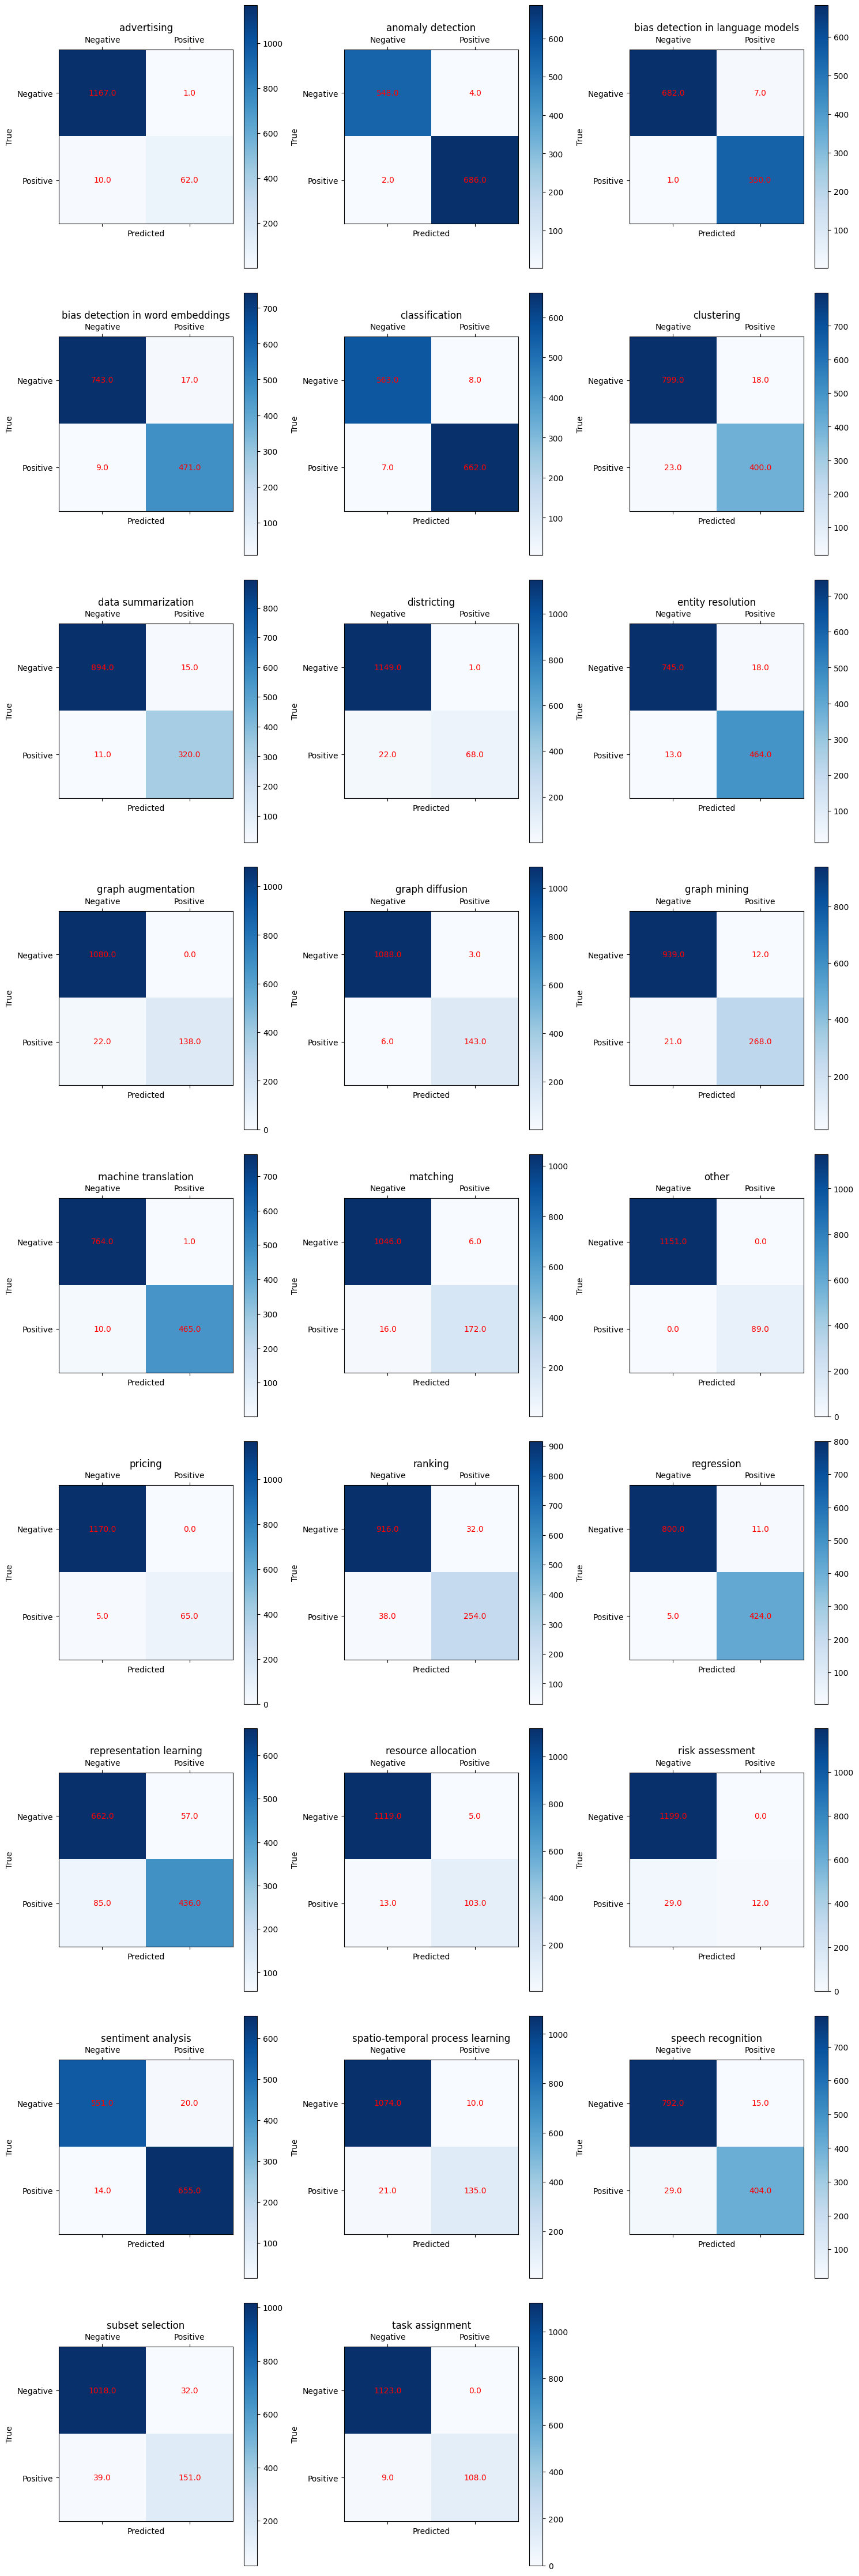

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from transformers import AlbertTokenizer
from sklearn.preprocessing import MultiLabelBinarizer
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset




# Define the BiLSTM model class
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, embedding_dim=128, dropout_rate=0.5):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer to reduce overfitting
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 because of bidirectional LSTM
        self.sigmoid = nn.Sigmoid()  # For multi-label classification

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out)  # Apply dropout after LSTM
        out = self.fc(lstm_out[:, -1, :])  # Take the last hidden state
        return self.sigmoid(out)

# Initialize the tokenizer for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Assuming you have already tokenized 'X' and binarized 'y'
X_tensor = torch.tensor(X.values, dtype=torch.long)  # Tokenized input
y_tensor = torch.tensor(y, dtype=torch.float)  # Multi-label target (binary)

# Initialize the model
input_dim = tokenizer.vocab_size  # Size of ALBERT's vocabulary
hidden_dim = 128  # Hidden layer size for LSTM
output_dim = y.shape[1]  # Number of output labels (26 in this case)
dropout_rate = 0.5  # Dropout rate

model = BiLSTMModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, dropout_rate=dropout_rate)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight_decay
loss_fn = nn.BCEWithLogitsLoss()


# Train and evaluate the model (simplified example)
num_epochs = 8
results = build_model_with_bilstm(model, X_tensor, y_tensor, num_epochs)



Fold 1/10...
Epoch 1/8 - Train Loss: 0.5232 - Precision: 0.5129, Recall: 0.1583, F1: 0.2419, Hamming Loss: 0.2472
Epoch 2/8 - Train Loss: 0.4955 - Precision: 0.5173, Recall: 0.2395, F1: 0.3274, Hamming Loss: 0.2452
Epoch 3/8 - Train Loss: 0.4931 - Precision: 0.5173, Recall: 0.2395, F1: 0.3274, Hamming Loss: 0.2452
Epoch 4/8 - Train Loss: 0.4932 - Precision: 0.5173, Recall: 0.2395, F1: 0.3274, Hamming Loss: 0.2452
Epoch 5/8 - Train Loss: 0.4926 - Precision: 0.5173, Recall: 0.2395, F1: 0.3274, Hamming Loss: 0.2452
Epoch 6/8 - Train Loss: 0.4922 - Precision: 0.5173, Recall: 0.2395, F1: 0.3274, Hamming Loss: 0.2452
Epoch 7/8 - Train Loss: 0.4921 - Precision: 0.5173, Recall: 0.2395, F1: 0.3274, Hamming Loss: 0.2452
Epoch 8/8 - Train Loss: 0.4916 - Precision: 0.5173, Recall: 0.2395, F1: 0.3274, Hamming Loss: 0.2452
Fold 2/10...
Epoch 1/8 - Train Loss: 0.4914 - Precision: 0.5234, Recall: 0.2422, F1: 0.3312, Hamming Loss: 0.2439
Epoch 2/8 - Train Loss: 0.4911 - Precision: 0.5234, Recall: 0.242

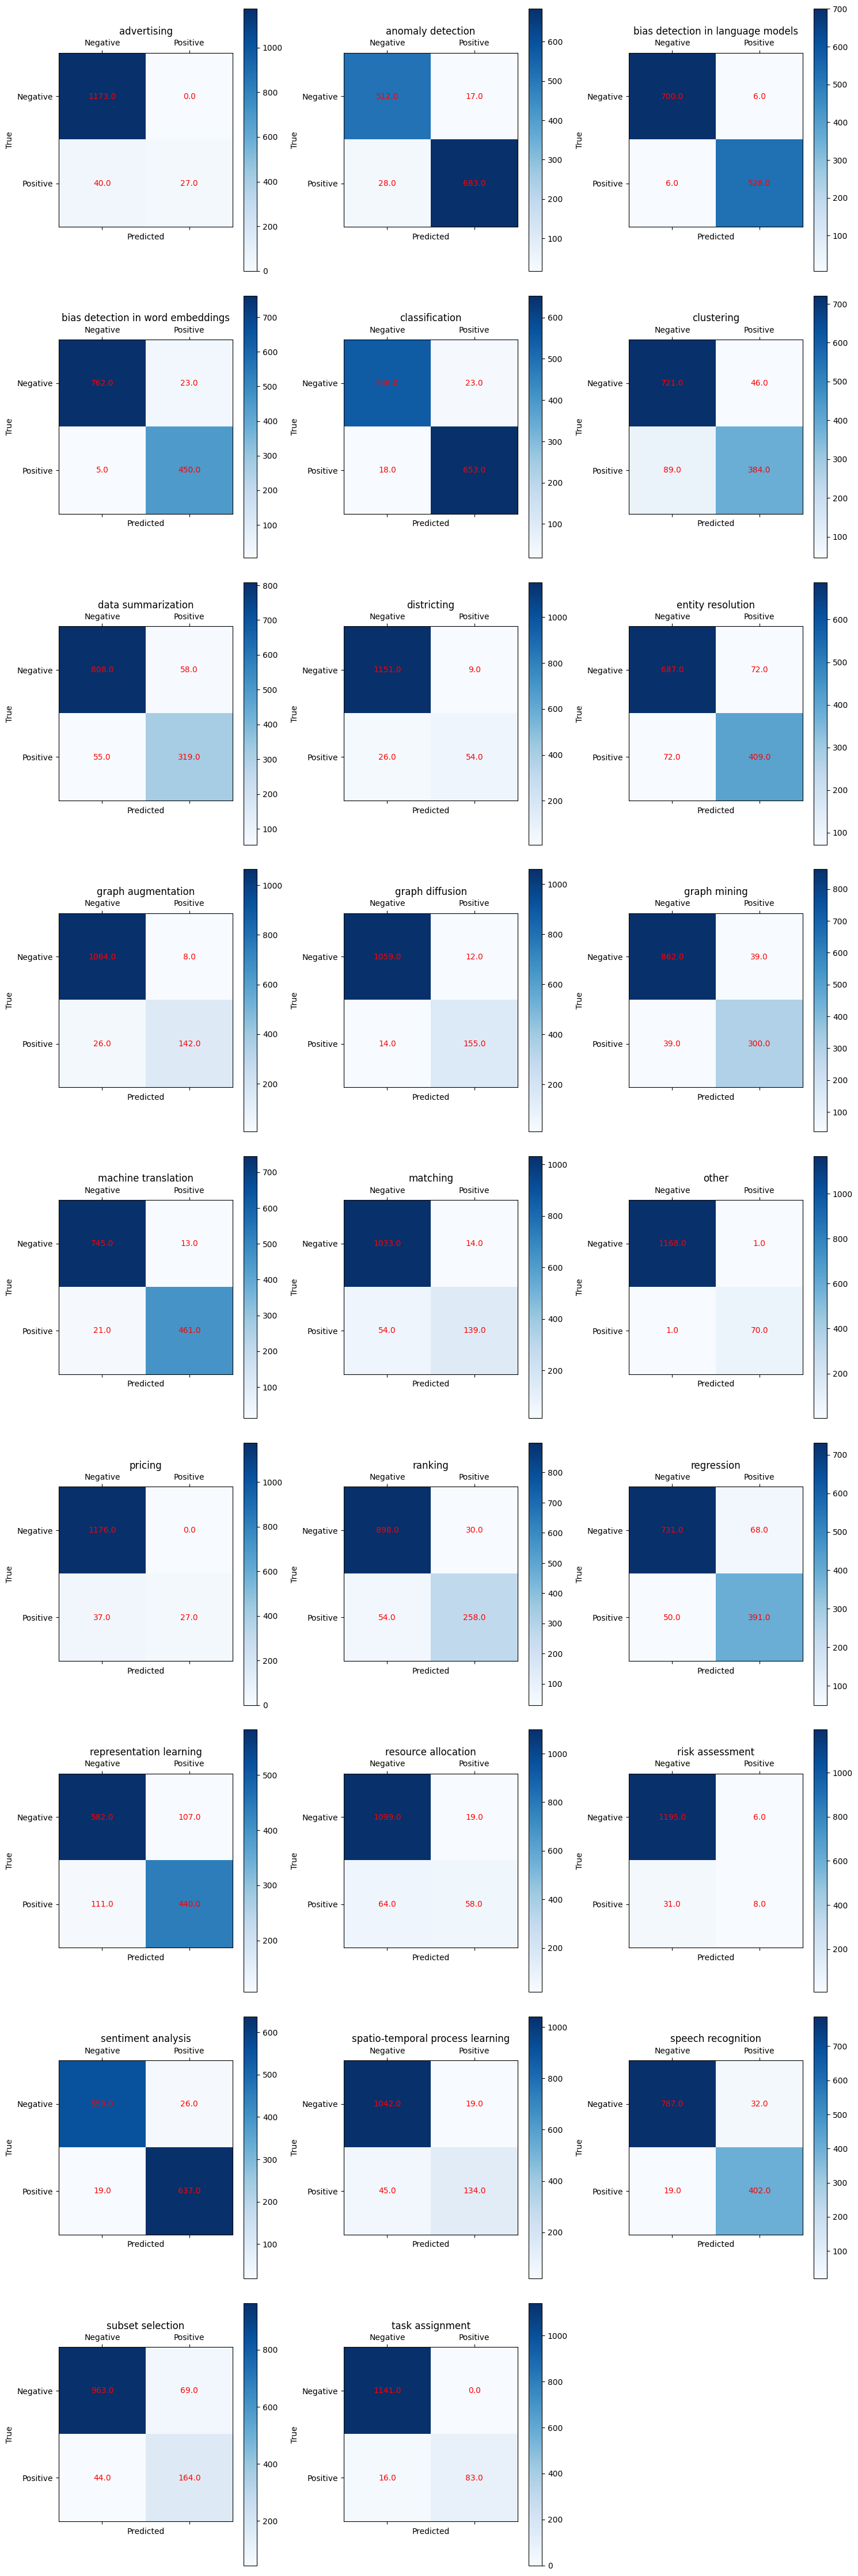

Final Results Across Folds:
Precision: 0.7312
Recall: 0.5593
F1 Score: 0.6233
Hamming Loss: 0.1514


In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from transformers import AlbertTokenizer
from sklearn.preprocessing import MultiLabelBinarizer
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset




# Define the BiLSTM model class
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, embedding_dim=128, dropout_rate=0.5):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer to reduce overfitting
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 because of bidirectional LSTM
        self.sigmoid = nn.Sigmoid()  # For multi-label classification

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out)  # Apply dropout after LSTM
        out = self.fc(lstm_out[:, -1, :])  # Take the last hidden state
        return self.sigmoid(out)

# Initialize the tokenizer for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Assuming you have already tokenized 'X' and binarized 'y'
X_tensor = torch.tensor(X.values, dtype=torch.long)  # Tokenized input
y_tensor = torch.tensor(y, dtype=torch.float)  # Multi-label target (binary)

# Initialize the model
input_dim = tokenizer.vocab_size  # Size of ALBERT's vocabulary
hidden_dim = 128  # Hidden layer size for LSTM
output_dim = y.shape[1]  # Number of output labels (26 in this case)
dropout_rate = 0.5  # Dropout rate

model = BiLSTMModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, dropout_rate=dropout_rate)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight_decay
loss_fn = nn.BCEWithLogitsLoss()


# Train and evaluate the model (simplified example)
num_epochs = 8
results = build_model_with_bilstm(model, X_tensor, y_tensor, num_epochs)



Fold 1/10...
Epoch 1/8 - Train Loss: 0.5185 - Precision: 0.5396, Recall: 0.2483, F1: 0.3401, Hamming Loss: 0.2416
Epoch 2/8 - Train Loss: 0.4977 - Precision: 0.5396, Recall: 0.2483, F1: 0.3401, Hamming Loss: 0.2416
Epoch 3/8 - Train Loss: 0.4939 - Precision: 0.5396, Recall: 0.2483, F1: 0.3401, Hamming Loss: 0.2416
Epoch 4/8 - Train Loss: 0.4887 - Precision: 0.5705, Recall: 0.2382, F1: 0.3360, Hamming Loss: 0.2360
Epoch 5/8 - Train Loss: 0.4593 - Precision: 0.7488, Recall: 0.2815, F1: 0.4092, Hamming Loss: 0.2038
Epoch 6/8 - Train Loss: 0.4073 - Precision: 0.7437, Recall: 0.4561, F1: 0.5654, Hamming Loss: 0.1758
Epoch 7/8 - Train Loss: 0.3672 - Precision: 0.7797, Recall: 0.5062, F1: 0.6139, Hamming Loss: 0.1597
Epoch 8/8 - Train Loss: 0.3363 - Precision: 0.7613, Recall: 0.6272, F1: 0.6878, Hamming Loss: 0.1428
Fold 2/10...
Epoch 1/8 - Train Loss: 0.3154 - Precision: 0.7744, Recall: 0.6719, F1: 0.7195, Hamming Loss: 0.1293
Epoch 2/8 - Train Loss: 0.2903 - Precision: 0.7939, Recall: 0.731

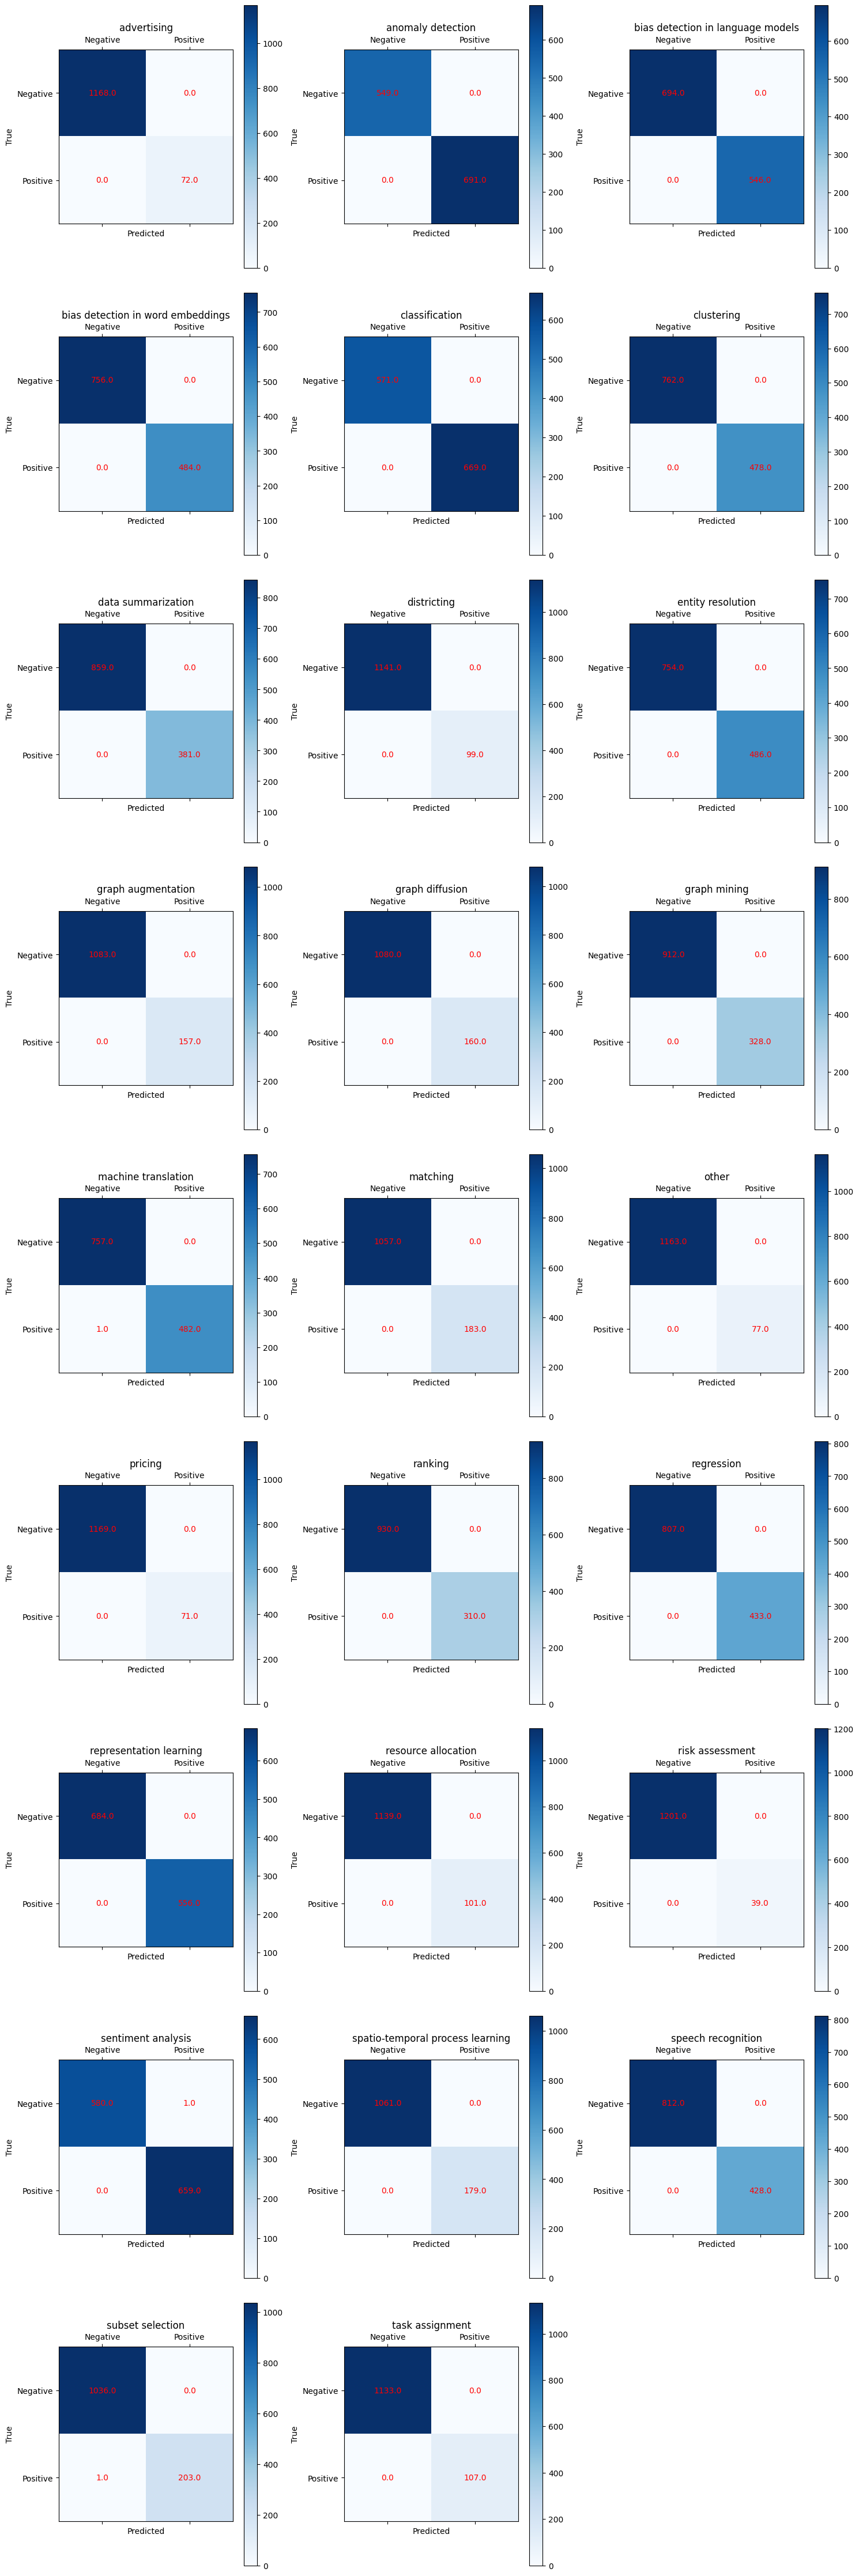

Final Results Across Folds:
Precision: 0.9612
Recall: 0.9354
F1 Score: 0.9475
Hamming Loss: 0.0245


In [ ]:
import torch
import torch.nn as nn
from transformers import RobertaTokenizer

# Define the GRU model class
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, embedding_dim=128, dropout_rate=0.5):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer to reduce overfitting
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 because of bidirectional GRU
        self.sigmoid = nn.Sigmoid()  # For multi-label classification

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        gru_out = self.dropout(gru_out)  # Apply dropout after GRU
        out = self.fc(gru_out[:, -1, :])  # Take the last hidden state
        return self.sigmoid(out)


# Initialize the tokenizer for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Assuming you have already tokenized 'X' and binarized 'y'
X_tensor = torch.tensor(X.values, dtype=torch.long)  # Tokenized input
y_tensor = torch.tensor(y, dtype=torch.float)  # Multi-label target (binary)

# Initialize the model
input_dim = tokenizer.vocab_size  # Size of RoBERTa's vocabulary
hidden_dim = 128  # Hidden layer size for GRU
output_dim = y.shape[1]  # Number of output labels (26 in this case)
dropout_rate = 0.5  # Dropout rate

model = GRUModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, dropout_rate=dropout_rate)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight_decay
loss_fn = nn.BCEWithLogitsLoss()  # Multi-label binary classification loss

# Train and evaluate the model (simplified example)
num_epochs = 8
results = build_model_with_bilstm(model, X_tensor, y_tensor, num_epochs)  # You can reuse this function



Fold 1/10...
Epoch 1/8 - Train Loss: 0.5177 - Precision: 0.5600, Recall: 0.1664, F1: 0.2566, Hamming Loss: 0.2498
Epoch 2/8 - Train Loss: 0.4954 - Precision: 0.5466, Recall: 0.2435, F1: 0.3369, Hamming Loss: 0.2483
Epoch 3/8 - Train Loss: 0.4929 - Precision: 0.5484, Recall: 0.2425, F1: 0.3363, Hamming Loss: 0.2479
Epoch 4/8 - Train Loss: 0.4827 - Precision: 0.6217, Recall: 0.2531, F1: 0.3597, Hamming Loss: 0.2334
Epoch 5/8 - Train Loss: 0.4396 - Precision: 0.7530, Recall: 0.3967, F1: 0.5197, Hamming Loss: 0.1900
Epoch 6/8 - Train Loss: 0.3894 - Precision: 0.7322, Recall: 0.5611, F1: 0.6354, Hamming Loss: 0.1668
Epoch 7/8 - Train Loss: 0.3576 - Precision: 0.7614, Recall: 0.5870, F1: 0.6629, Hamming Loss: 0.1546
Epoch 8/8 - Train Loss: 0.3336 - Precision: 0.7783, Recall: 0.6141, F1: 0.6866, Hamming Loss: 0.1453
Fold 2/10...
Epoch 1/8 - Train Loss: 0.3166 - Precision: 0.8022, Recall: 0.6377, F1: 0.7106, Hamming Loss: 0.1325
Epoch 2/8 - Train Loss: 0.2972 - Precision: 0.7940, Recall: 0.709

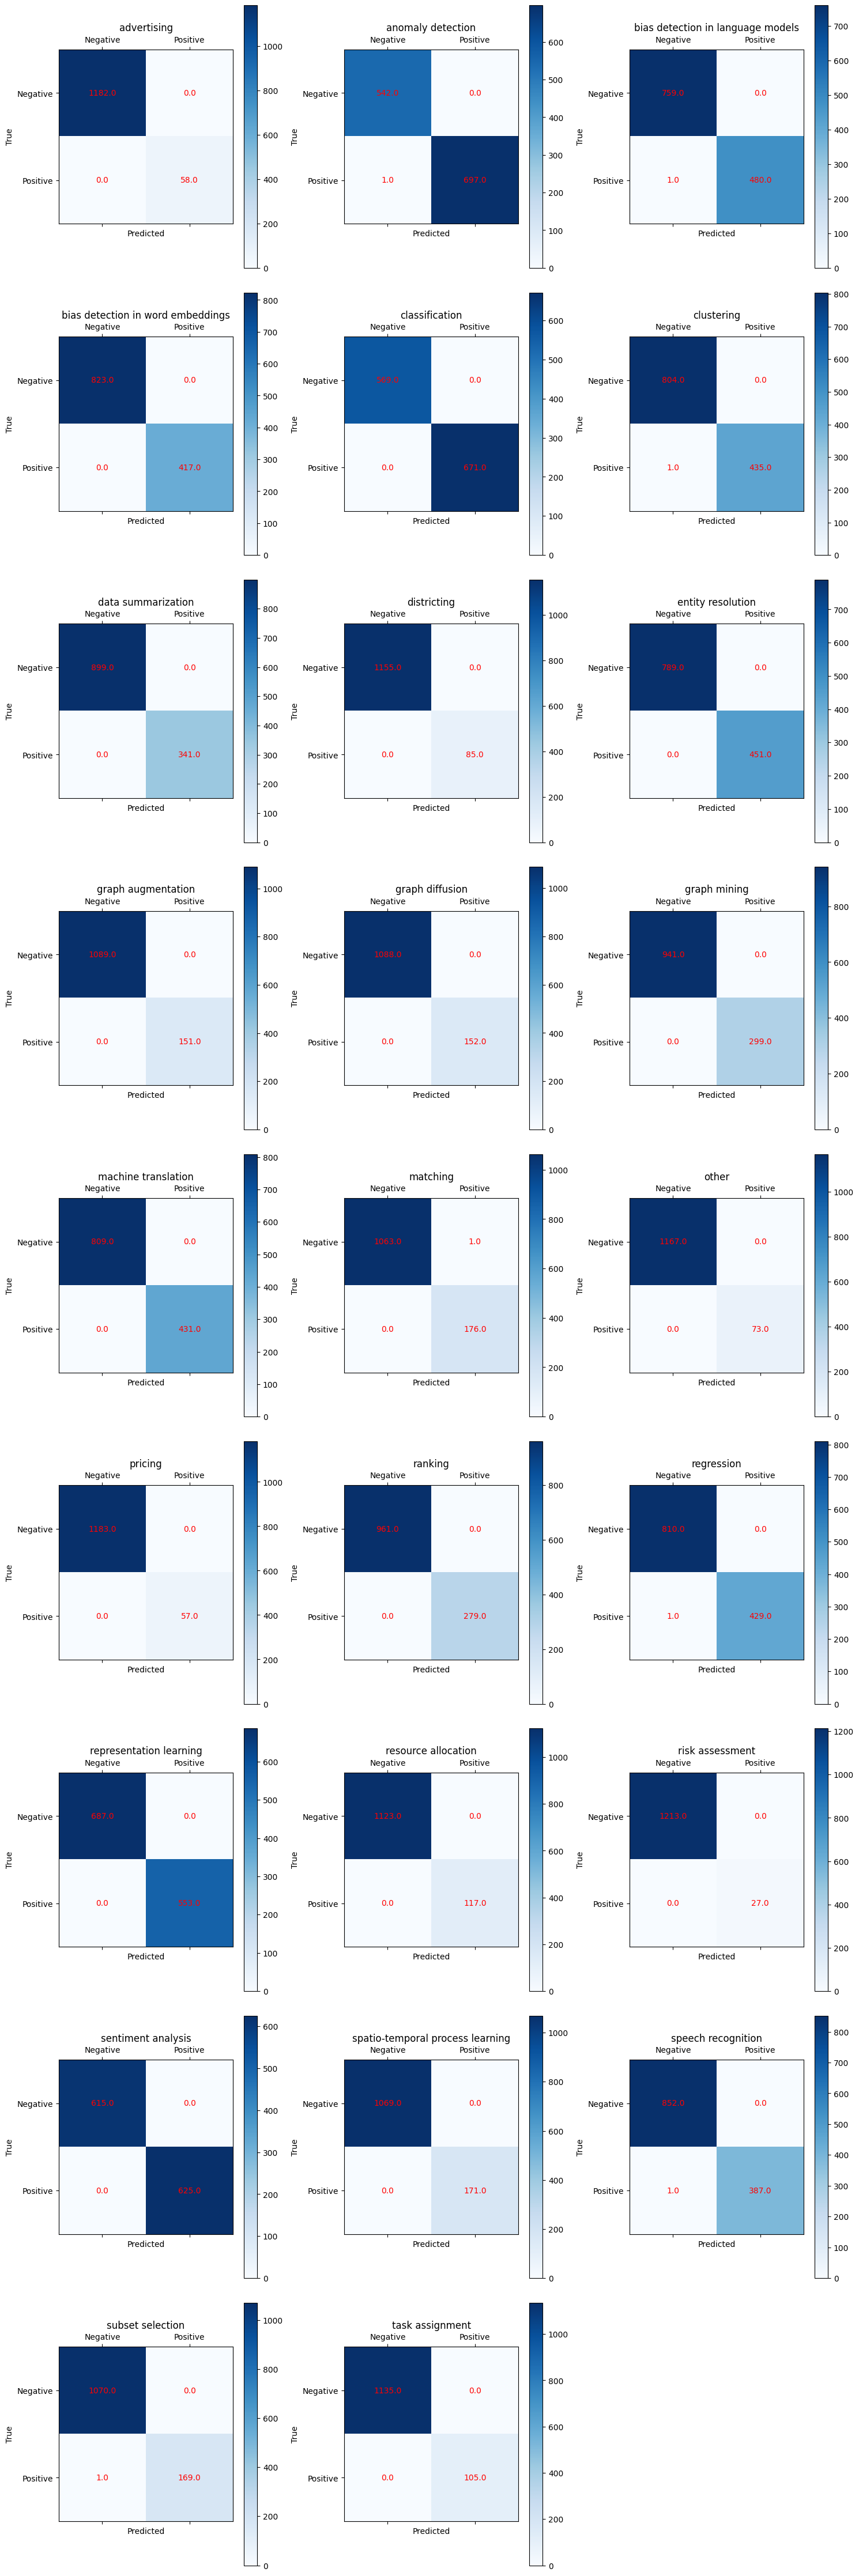

Final Results Across Folds:
Precision: 0.9585
Recall: 0.9366
F1 Score: 0.9465
Hamming Loss: 0.0255


In [10]:
# Define the BiGRU model class
class BiGRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, embedding_dim=128, dropout_rate=0.5):
        super(BiGRUModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer to reduce overfitting
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 because of bidirectional GRU
        self.sigmoid = nn.Sigmoid()  # For multi-label classification

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        gru_out = self.dropout(gru_out)  # Apply dropout after GRU
        out = self.fc(gru_out[:, -1, :])  # Take the last hidden state
        return self.sigmoid(out)

        # Initialize the tokenizer for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Assuming you have already tokenized 'X' and binarized 'y'
X_tensor = torch.tensor(X.values, dtype=torch.long)  # Tokenized input
y_tensor = torch.tensor(y, dtype=torch.float)  # Multi-label target (binary)

# Initialize the model
input_dim = tokenizer.vocab_size  # Size of RoBERTa's vocabulary
hidden_dim = 128  # Hidden layer size for GRU
output_dim = y.shape[1]  # Number of output labels (26 in this case)
dropout_rate = 0.5  # Dropout rate

model = BiGRUModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, dropout_rate=dropout_rate)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight_decay
loss_fn = nn.BCEWithLogitsLoss()  # Multi-label binary classification loss

# Train and evaluate the model (simplified example)
num_epochs = 8
results = build_model_with_bilstm(model, X_tensor, y_tensor, num_epochs)  # You can reuse this function


# RandomForest

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.9186371887658942
Recall Score: 0.6332516164875521
F1 Score: 0.7496470053063409
Hamming Loss: 0.10591608214379263


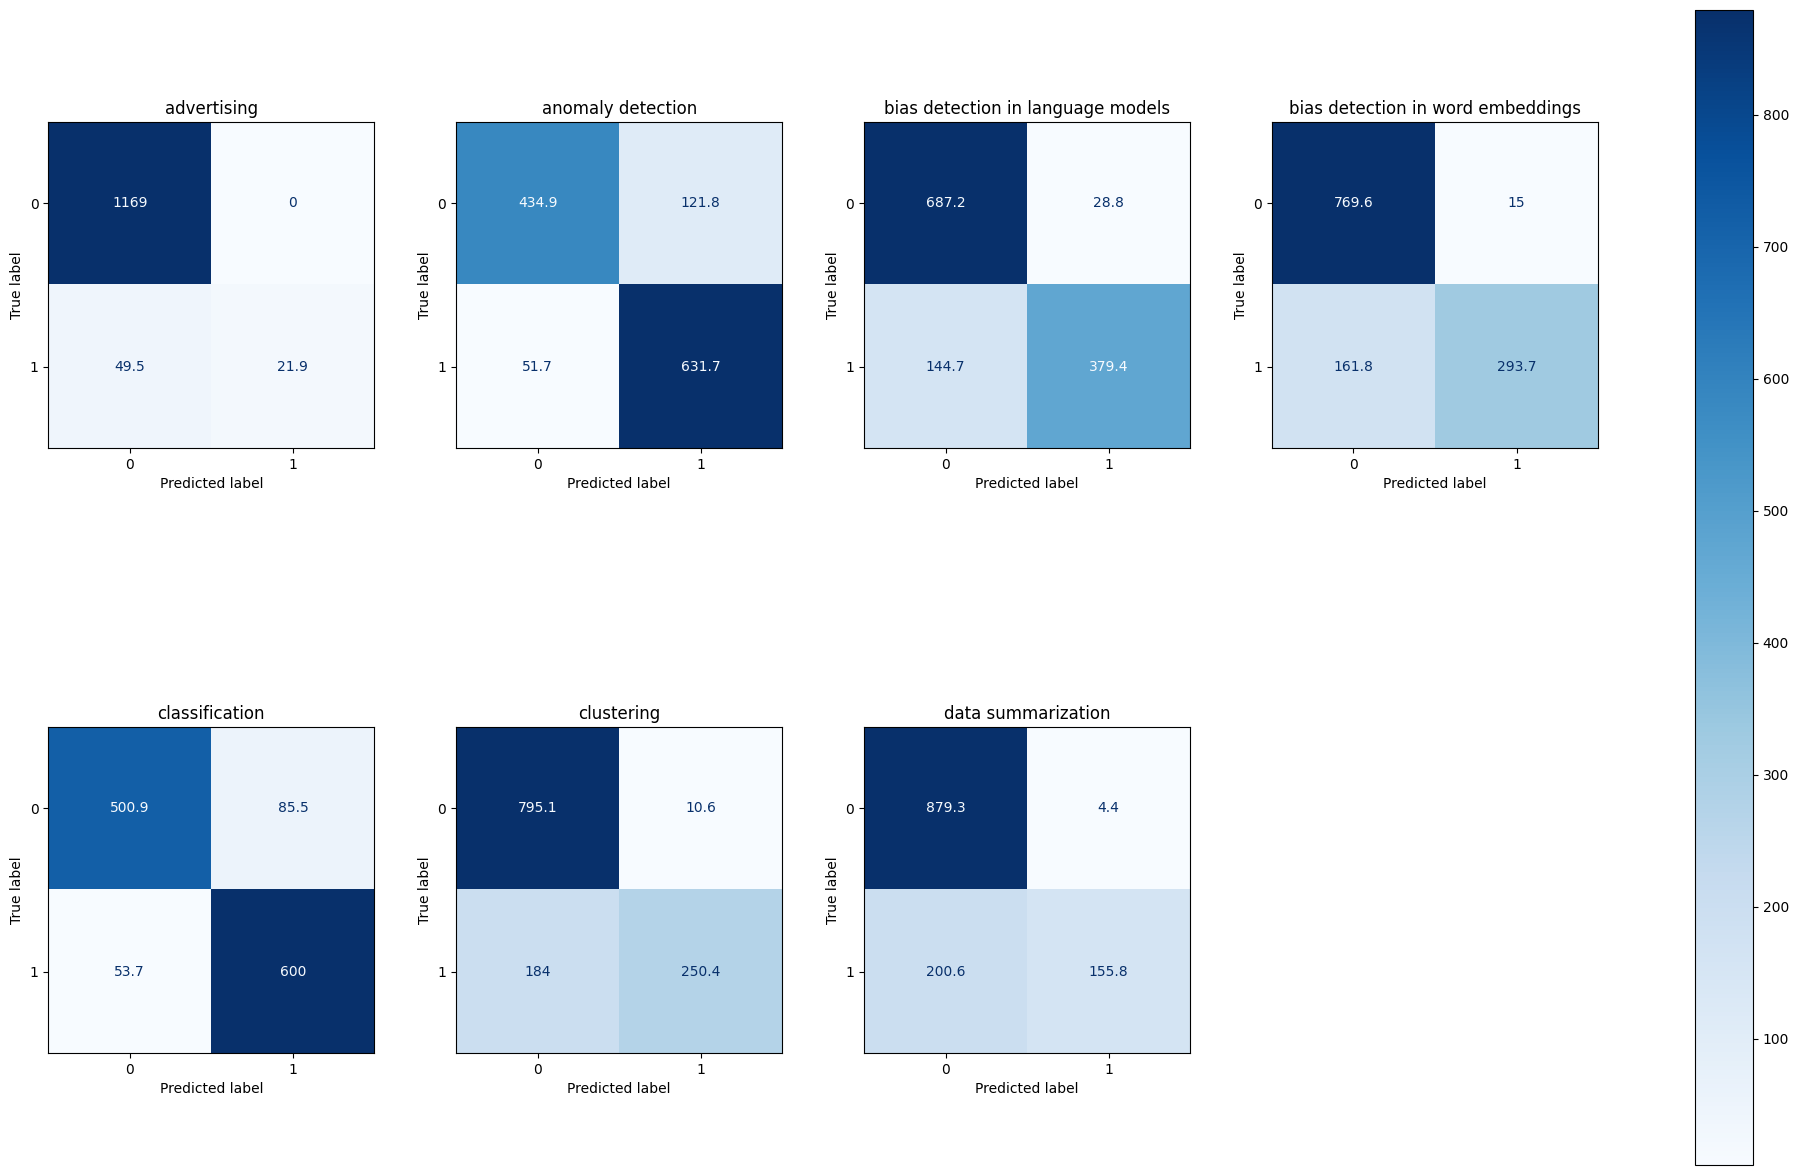

In [ ]:
model = RandomForestClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 2/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 3/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 4/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 5/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 6/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 7/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 8/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 9/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 10/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Precision: 0.5594028304517229
Recall Score: 0.22034493401996405
F1 Score: 0.3160735518359646
Hamming Loss: 0.2387870733799485


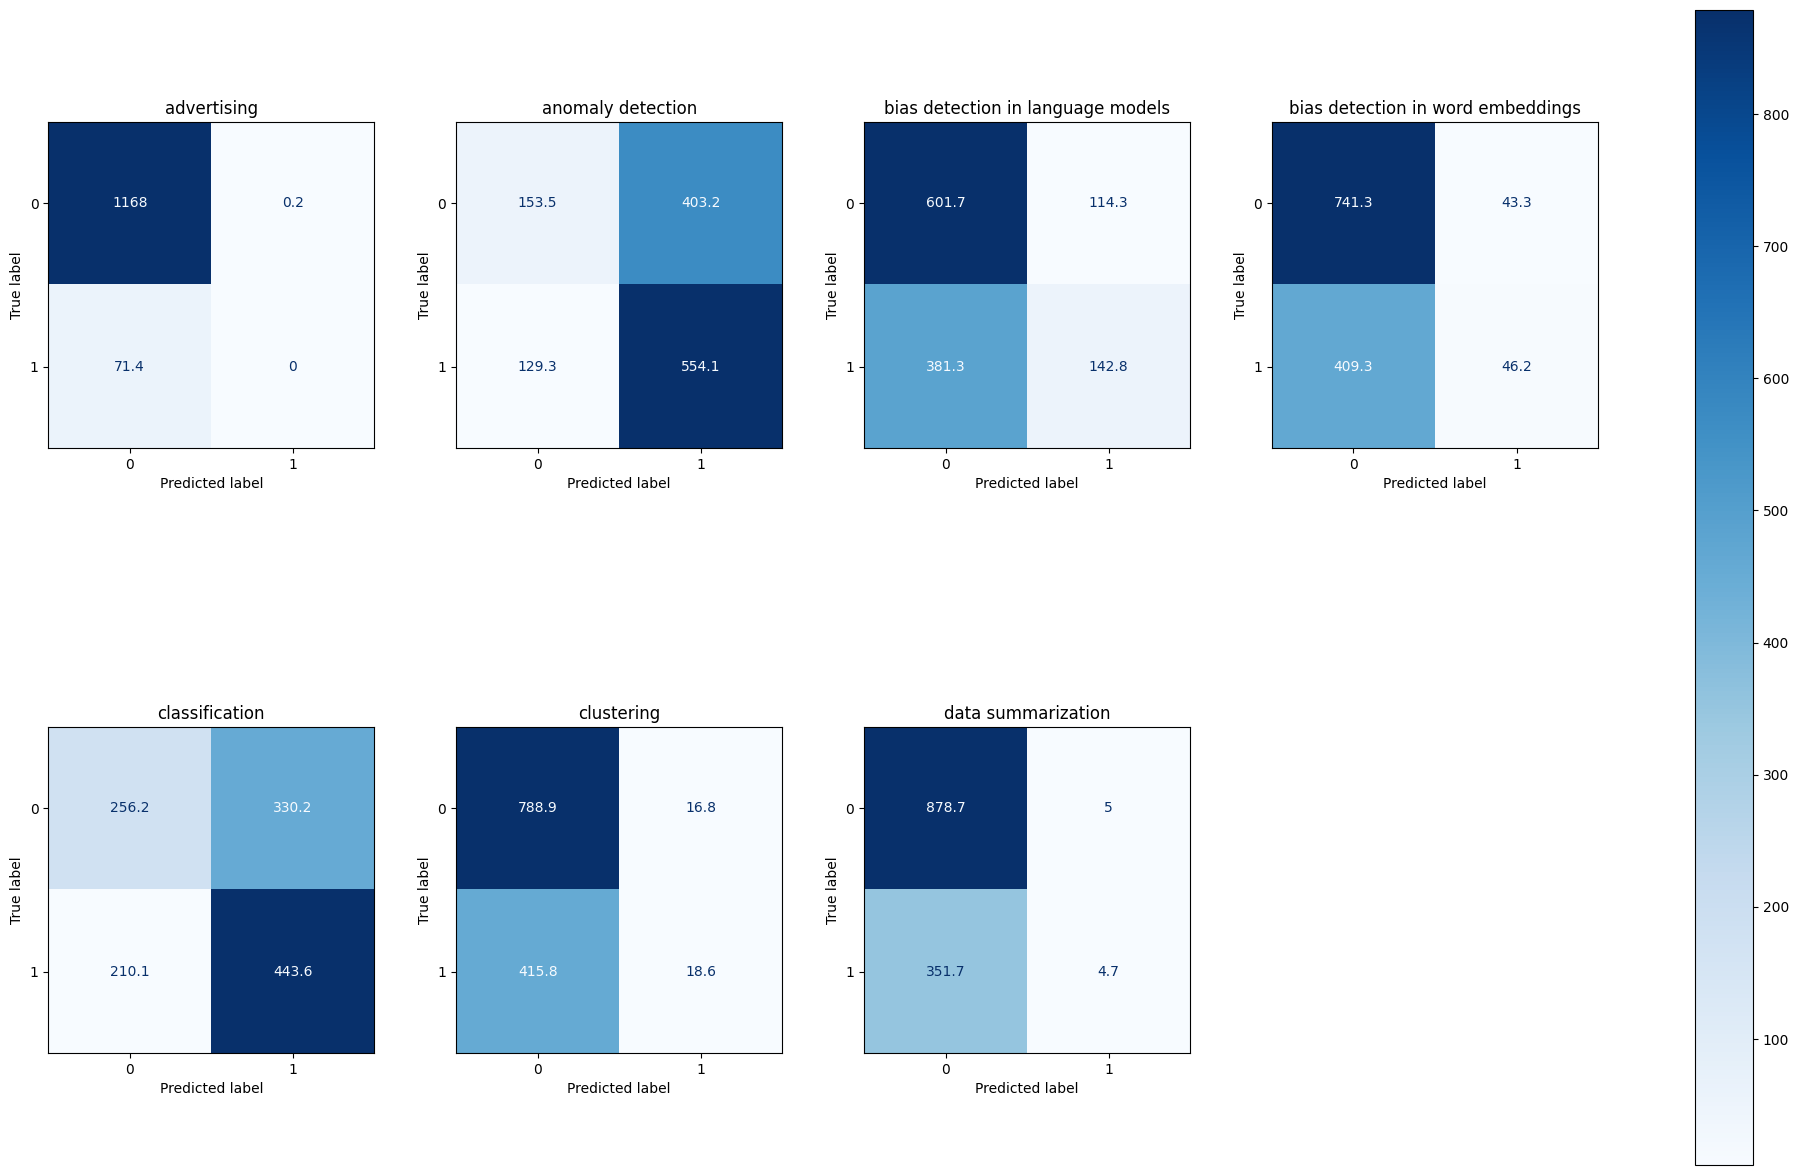

In [ ]:
model = LogisticRegression()

prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.14384663676622716
Recall Score: 0.25985879887899627
F1 Score: 0.18514077601549103
Hamming Loss: 0.5727590562721572


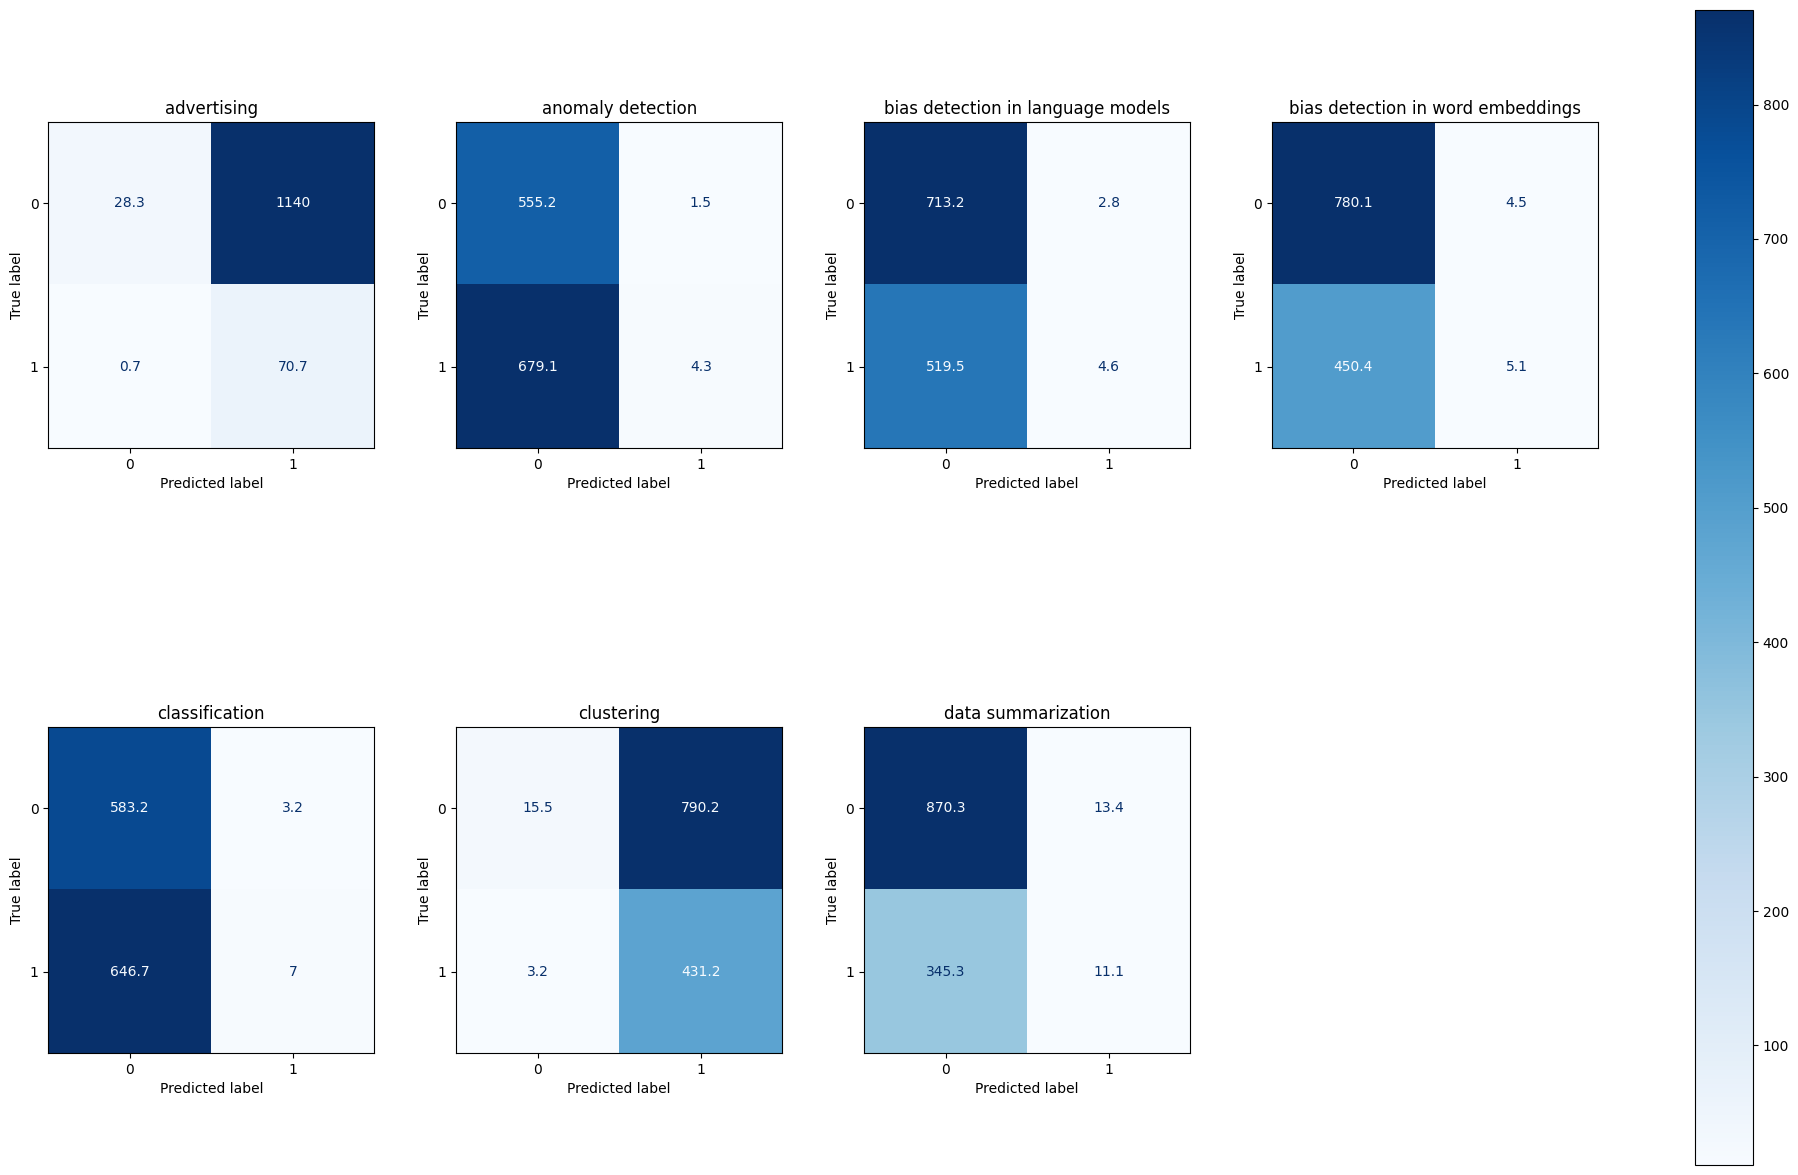

In [ ]:
model = GaussianNB()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.6766971777770693
Recall Score: 0.49758940196502993
F1 Score: 0.5733552290698626
Hamming Loss: 0.1853631556637067


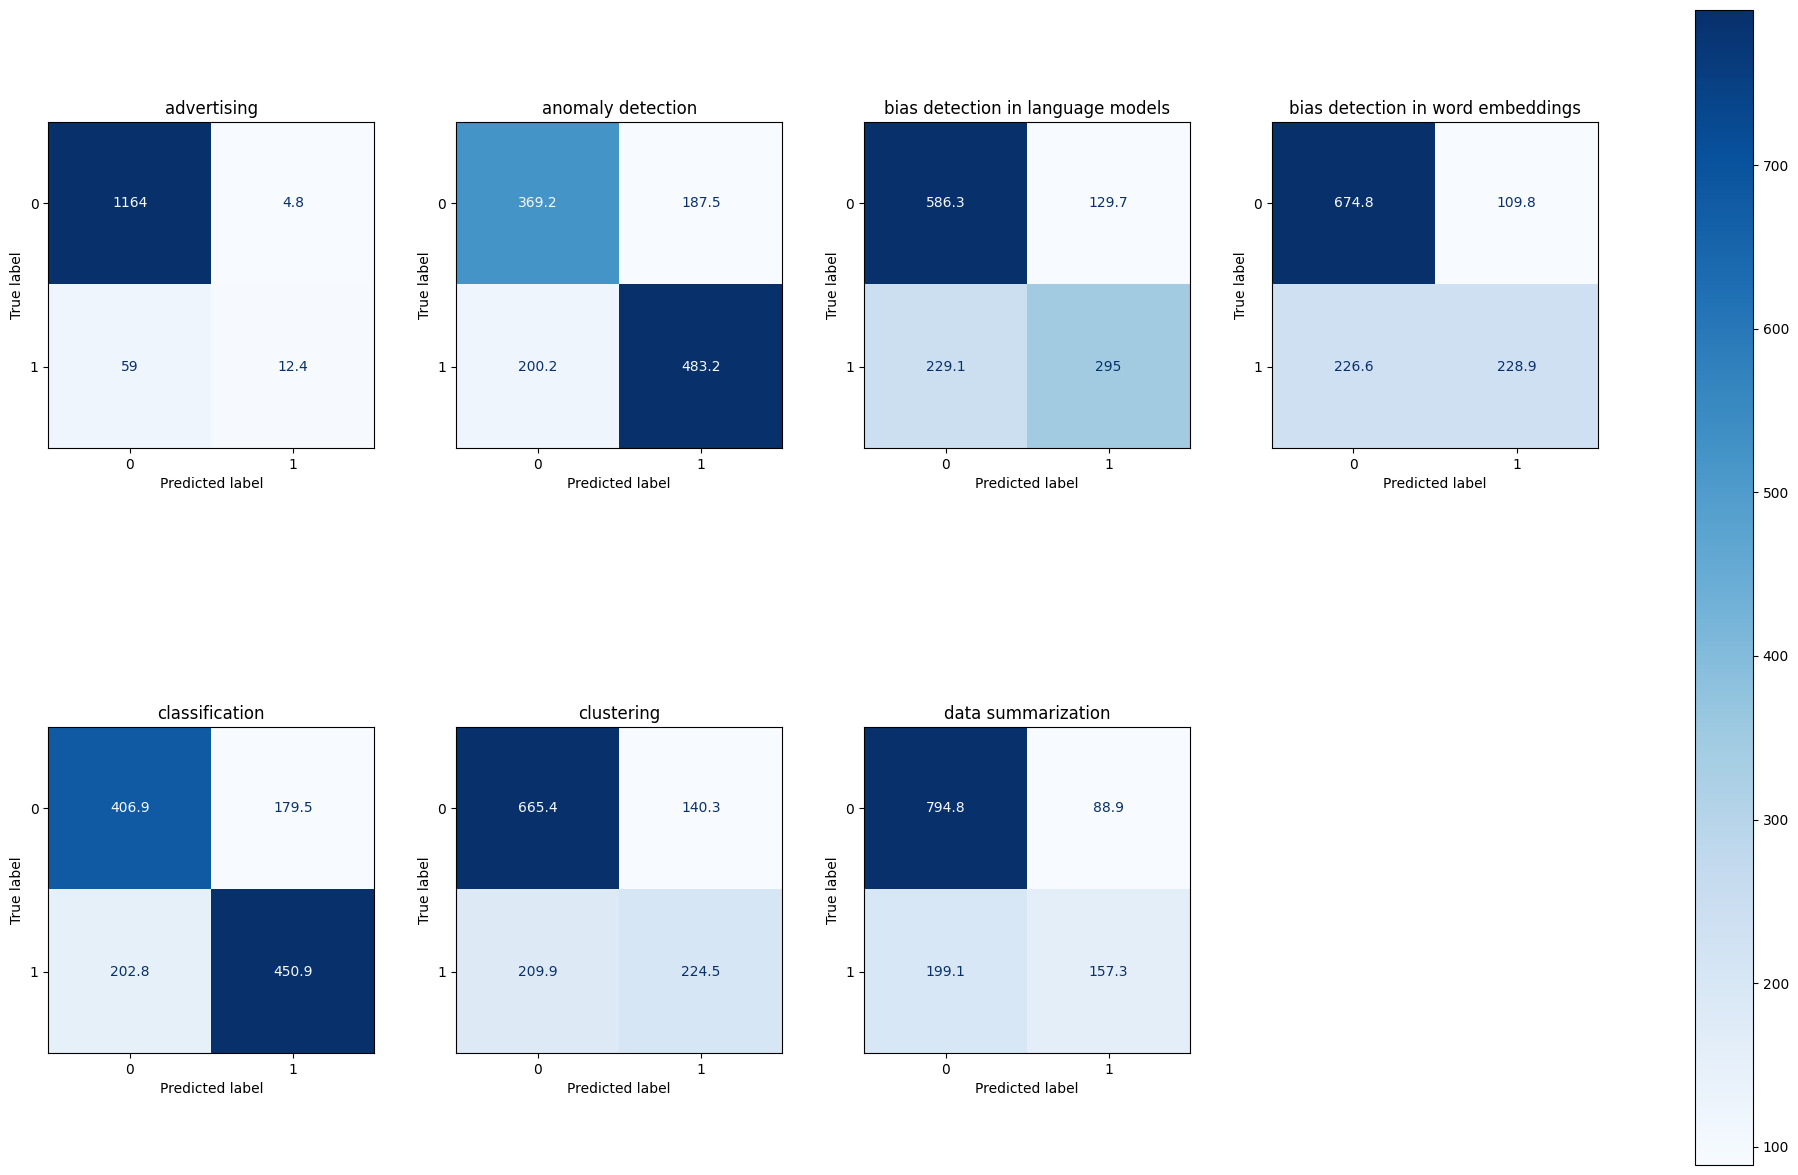

In [ ]:
model = KNeighborsClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.769295341659388
Recall Score: 0.7826447836512731
F1 Score: 0.7758814811468241
Hamming Loss: 0.11323560904017611


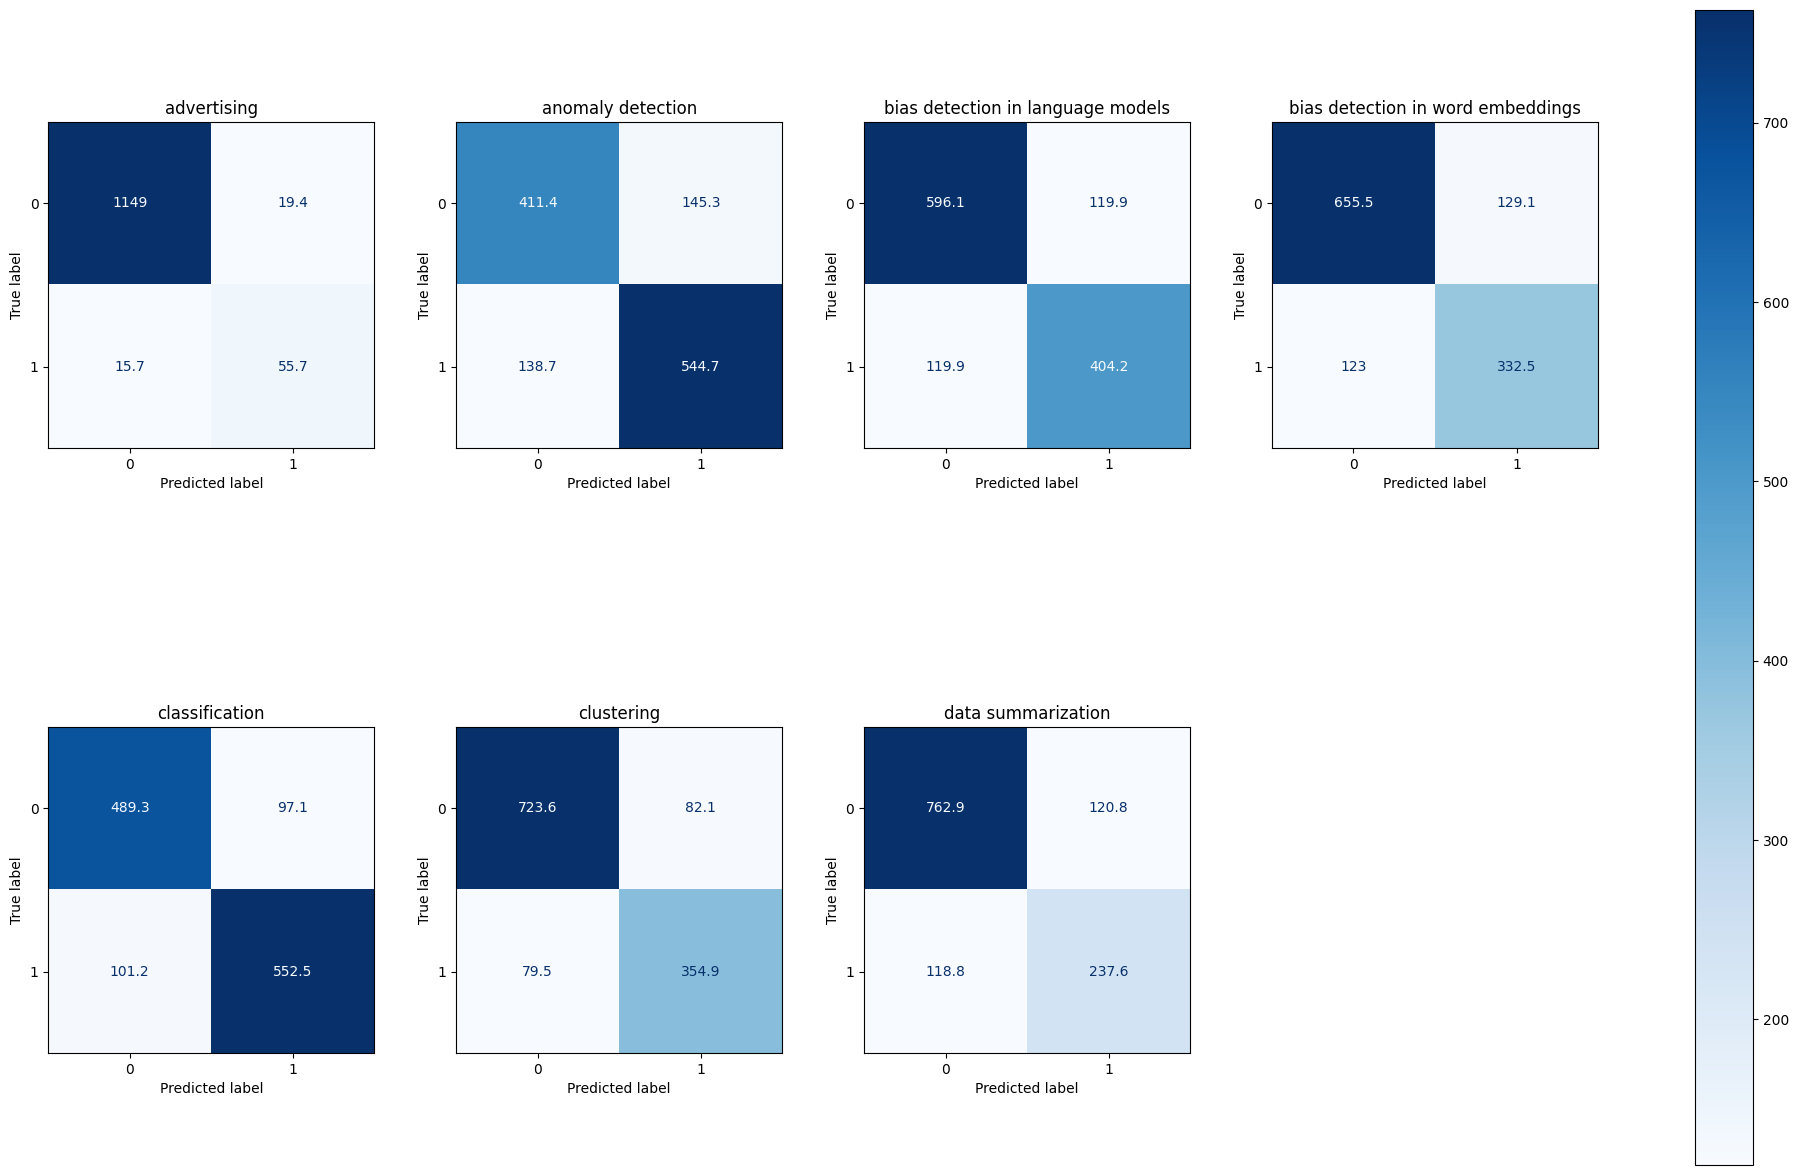

In [ ]:
model = DecisionTreeClassifier()

prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

In [ ]:
model = LinearSVC()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

# ClassifierChain

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.8131826766812973
Recall Score: 0.7333004674239376
F1 Score: 0.771049768344386
Hamming Loss: 0.10898602443798826


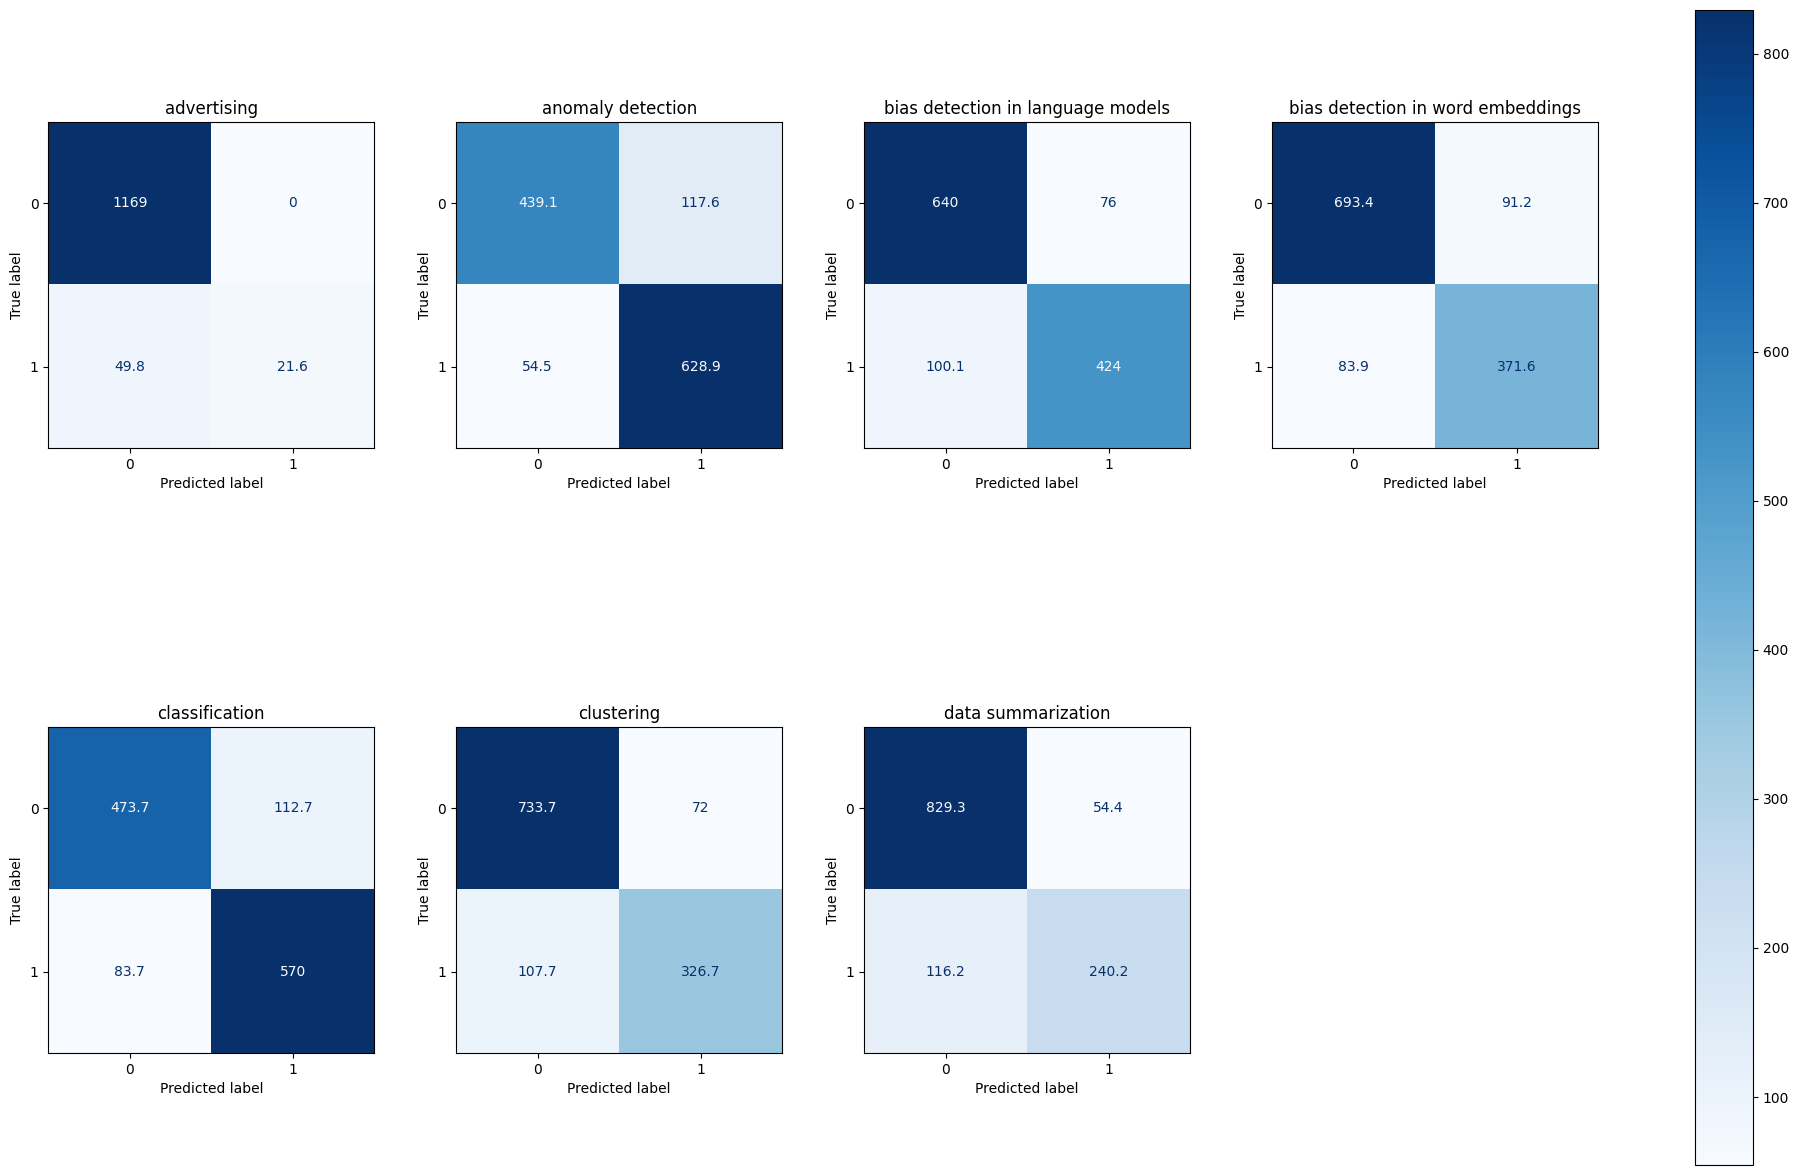

In [ ]:
model = RandomForestClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 2/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 3/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 4/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 5/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 6/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 7/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 8/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 9/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 10/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Precision: 0.5596868892175795
Recall Score: 0.2207706115243772
F1 Score: 0.31652963253566513
Hamming Loss: 0.23870632074509673


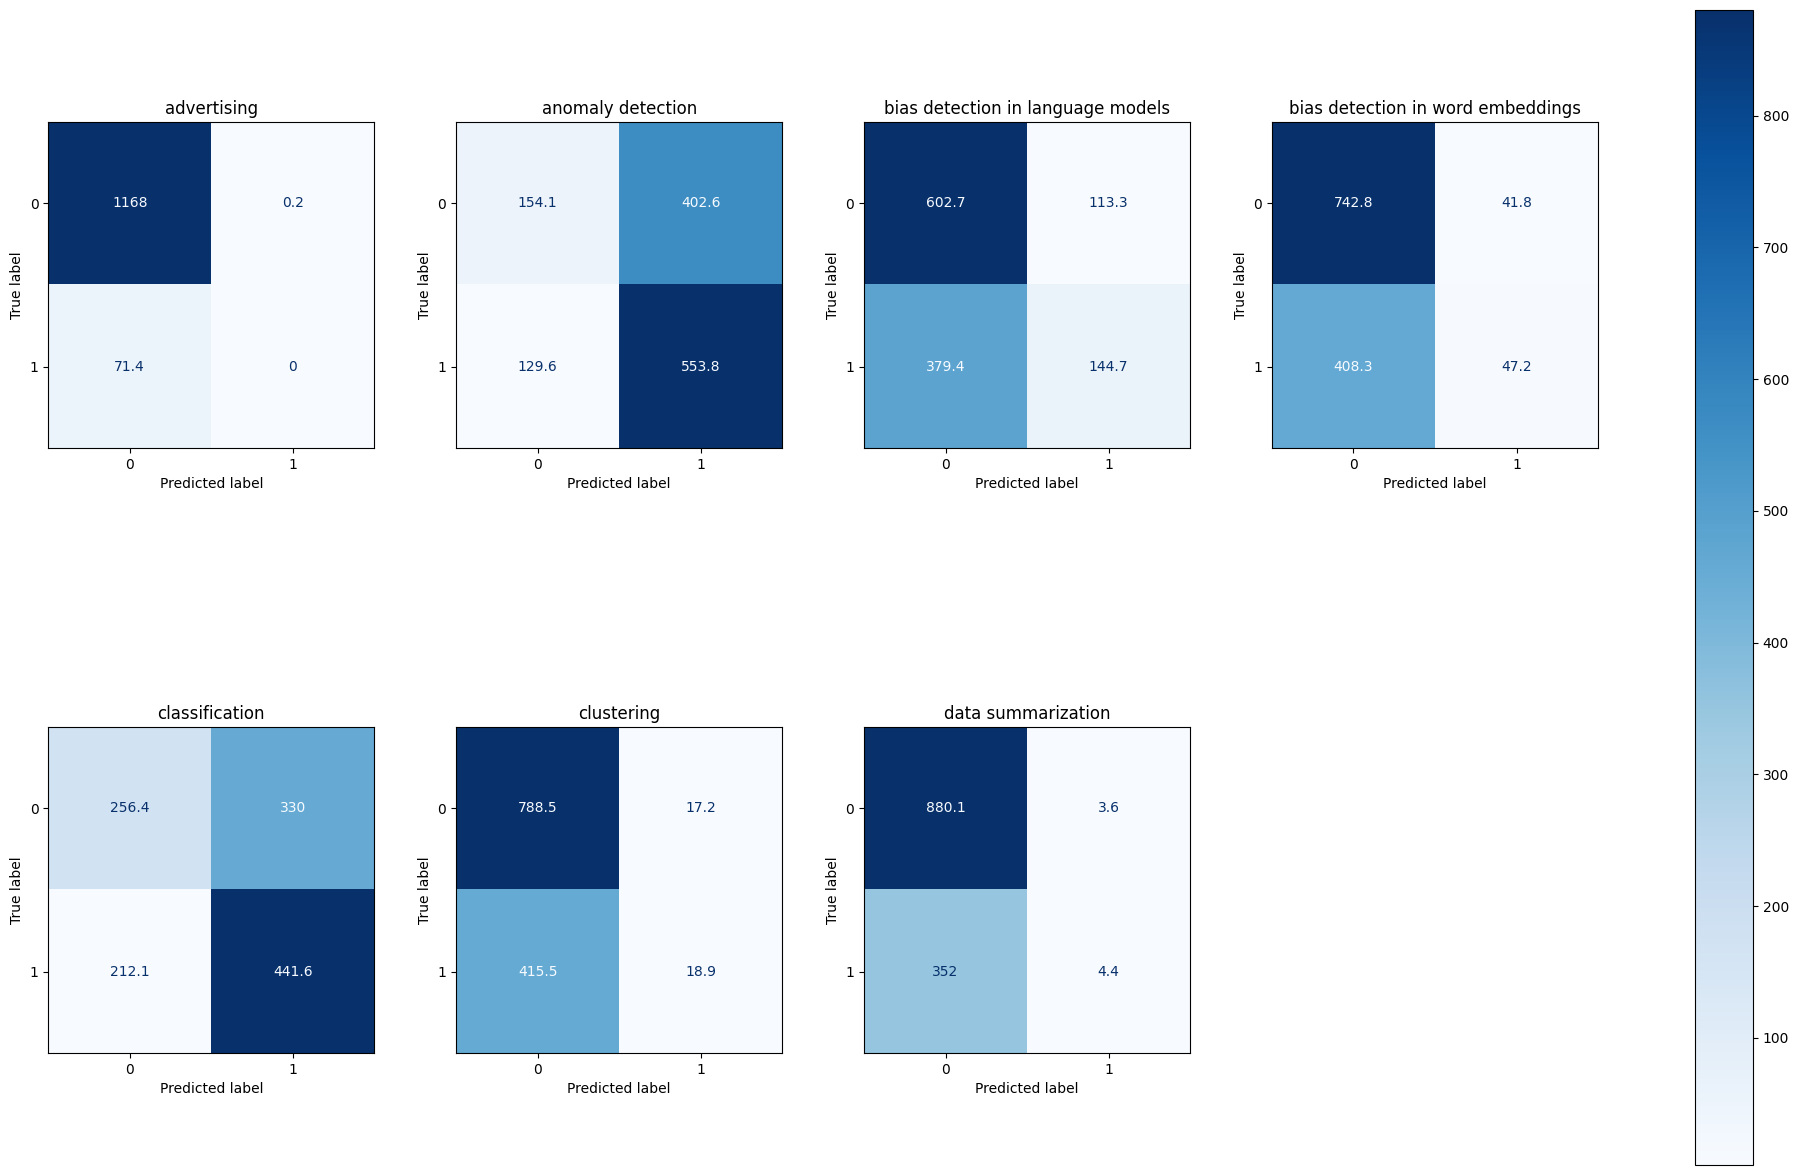

In [ ]:
model = LogisticRegression()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.14373074269539554
Recall Score: 0.26082793246683383
F1 Score: 0.1853091108579512
Hamming Loss: 0.5743950513173759


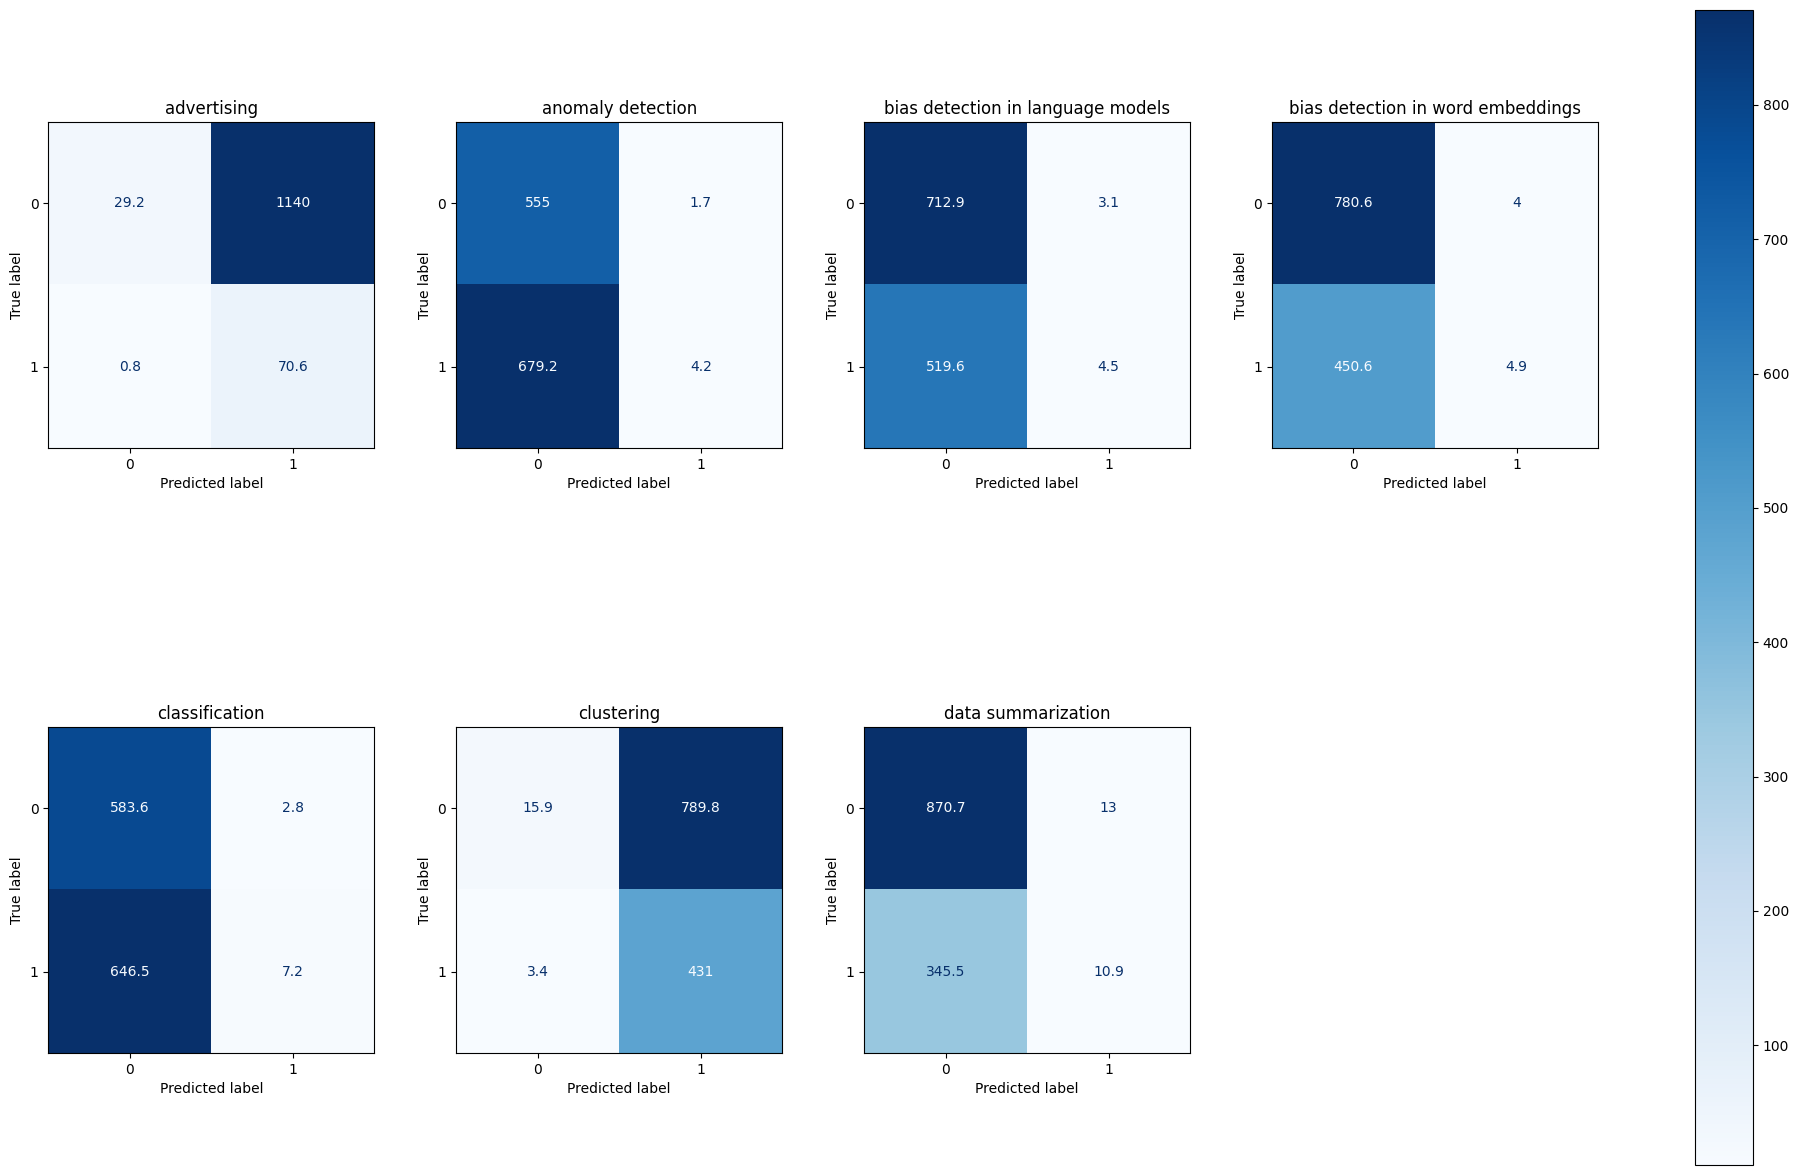

In [ ]:
model = GaussianNB()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.681038830227459
Recall Score: 0.5012204872862969
F1 Score: 0.5773079678092281
Hamming Loss: 0.18372038228595766


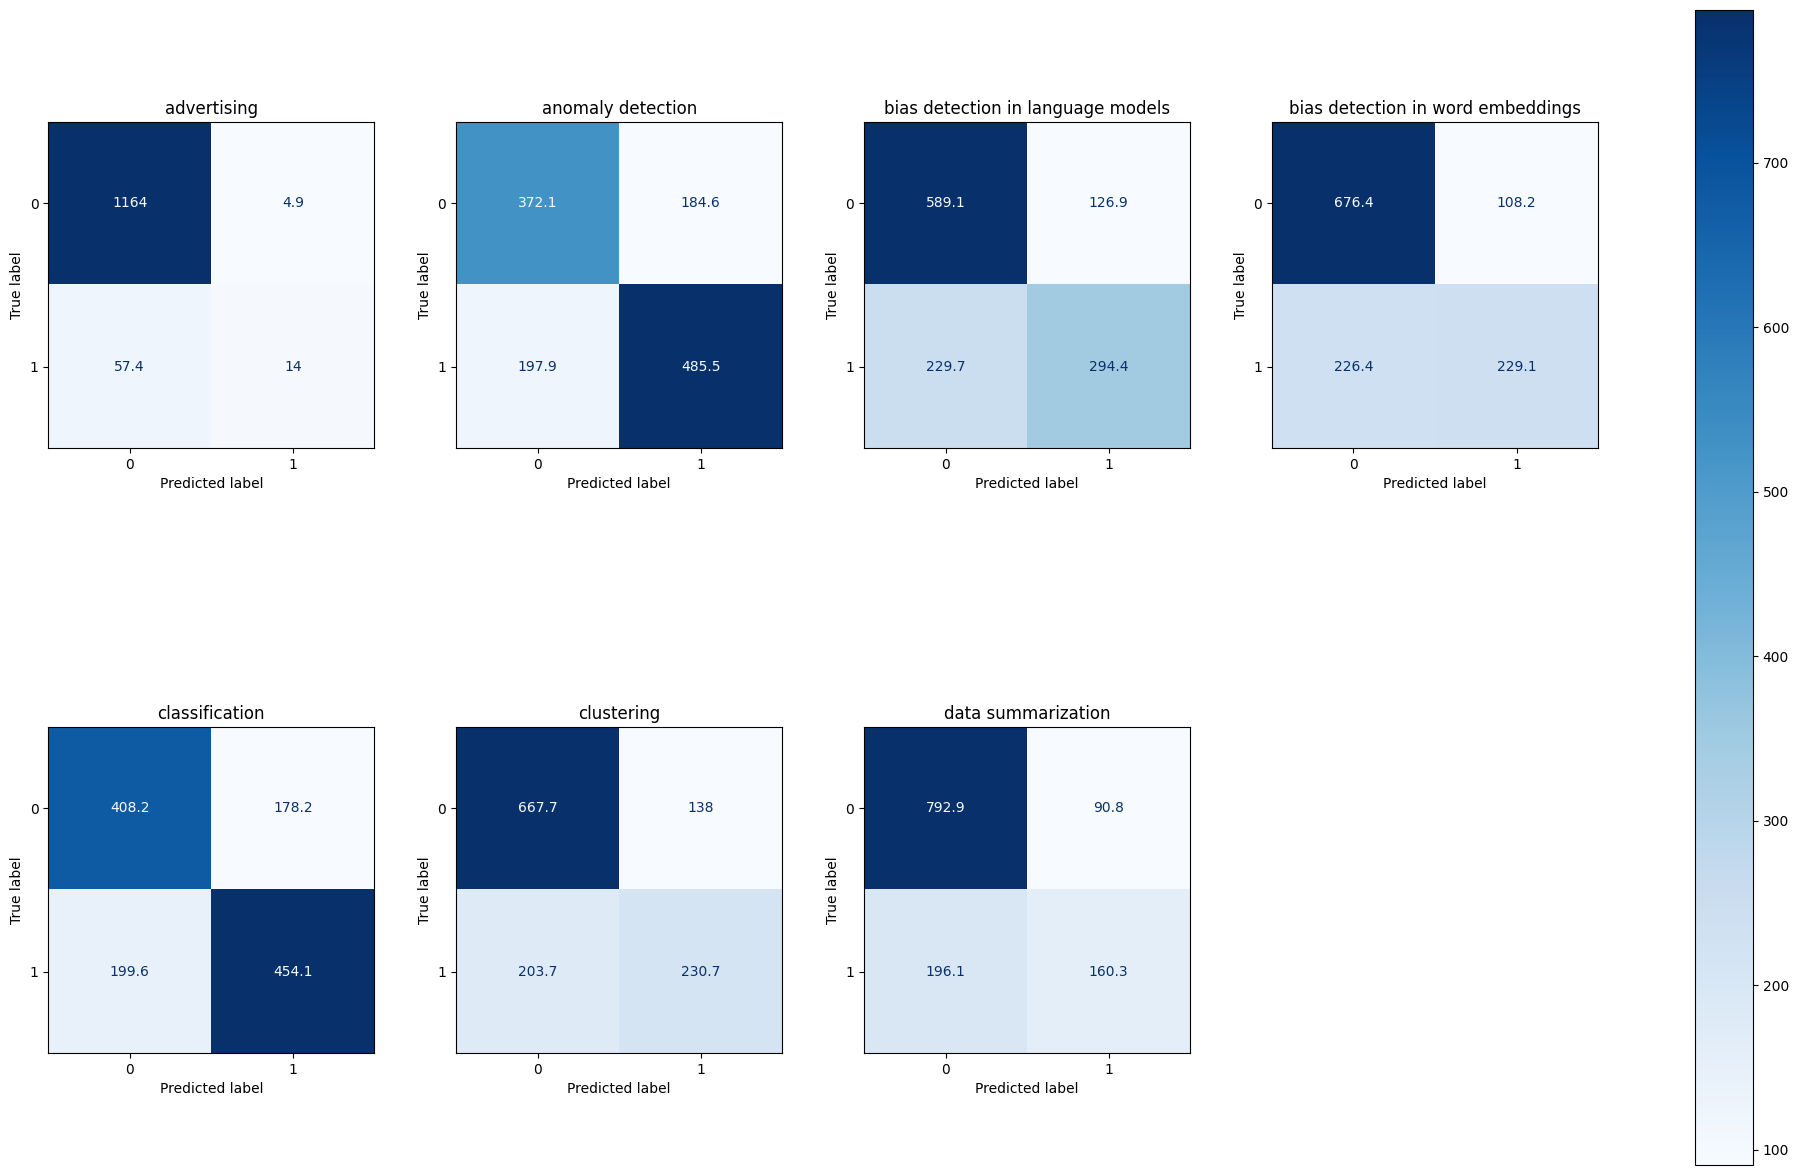

In [ ]:
model = KNeighborsClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.6975616269003602
Recall Score: 0.700764011209274
F1 Score: 0.6990803712134769
Hamming Loss: 0.15104093393025314


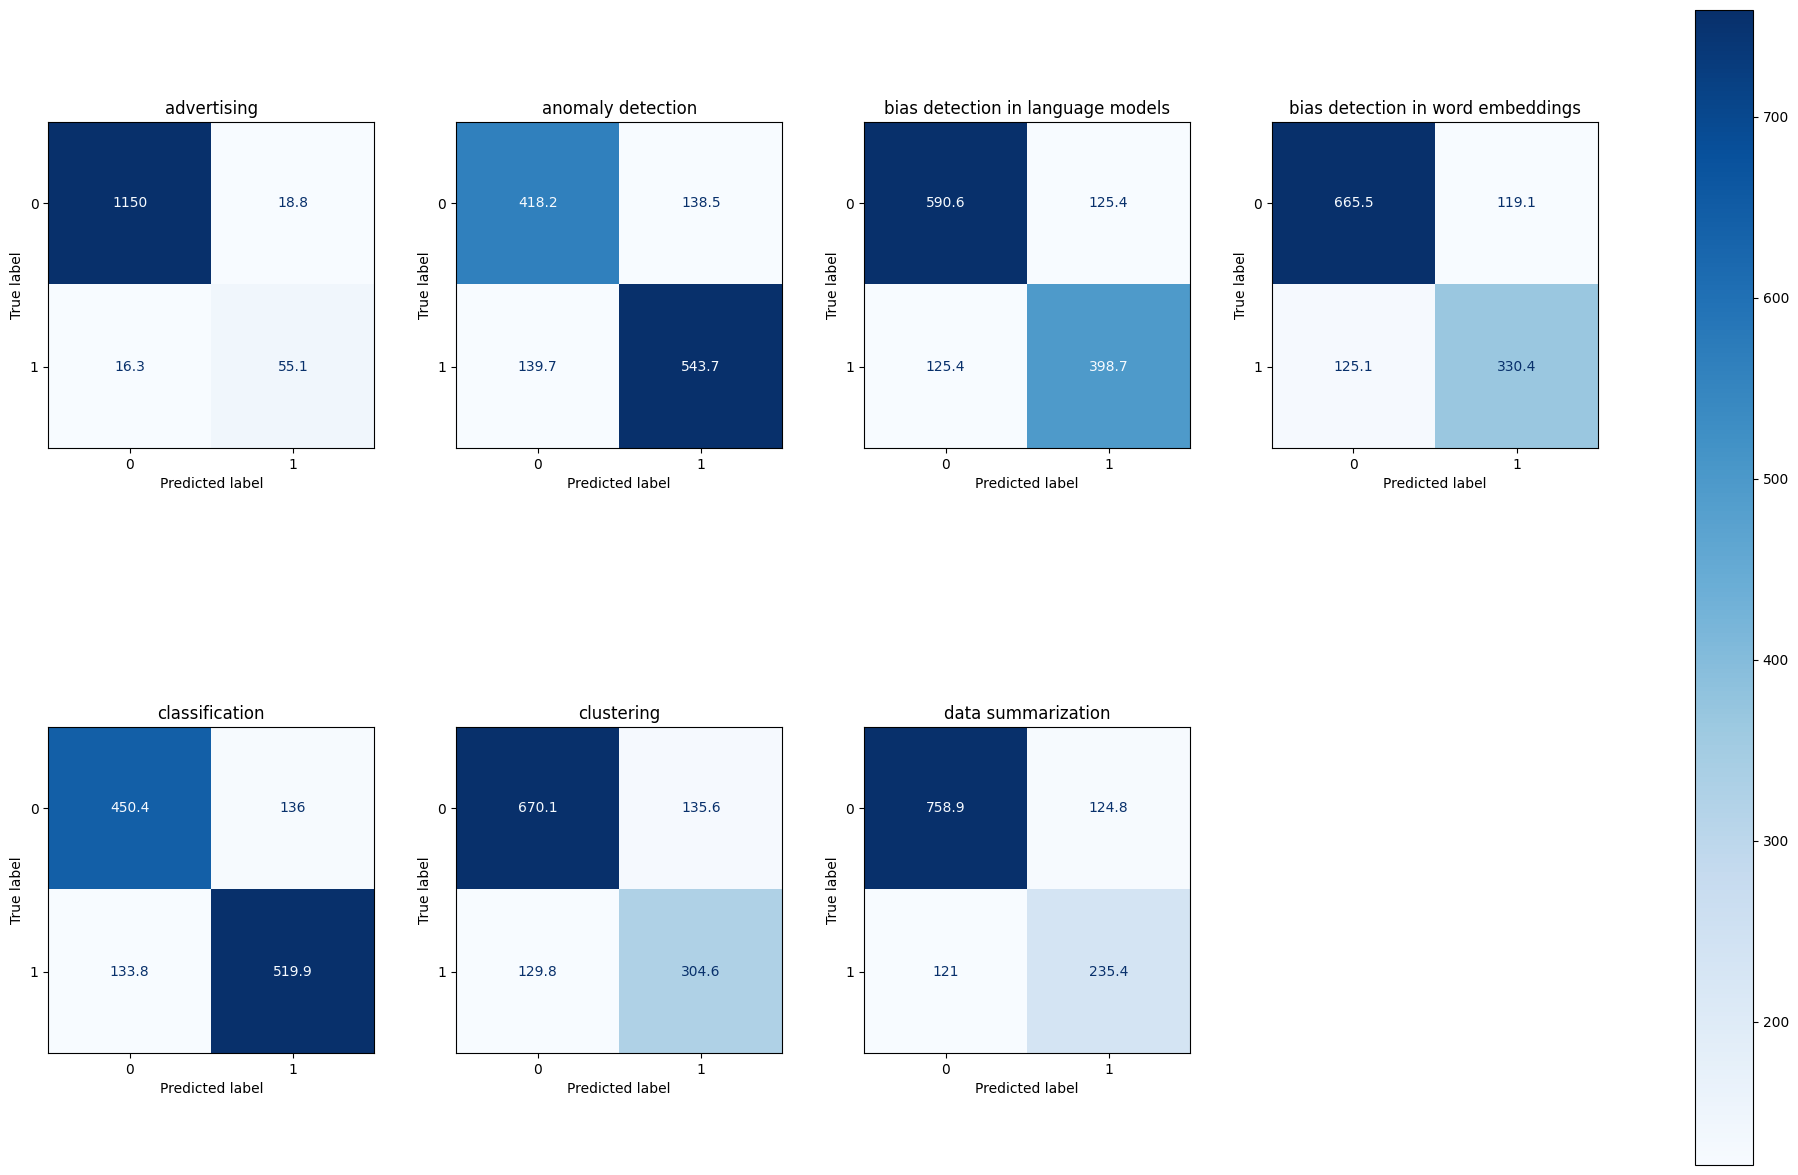

In [ ]:
model = DecisionTreeClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

# LabelPowerSet


Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.8977888931101452
Recall Score: 0.7874857211397113
F1 Score: 0.838977842385195
Hamming Loss: 0.07571347448527661


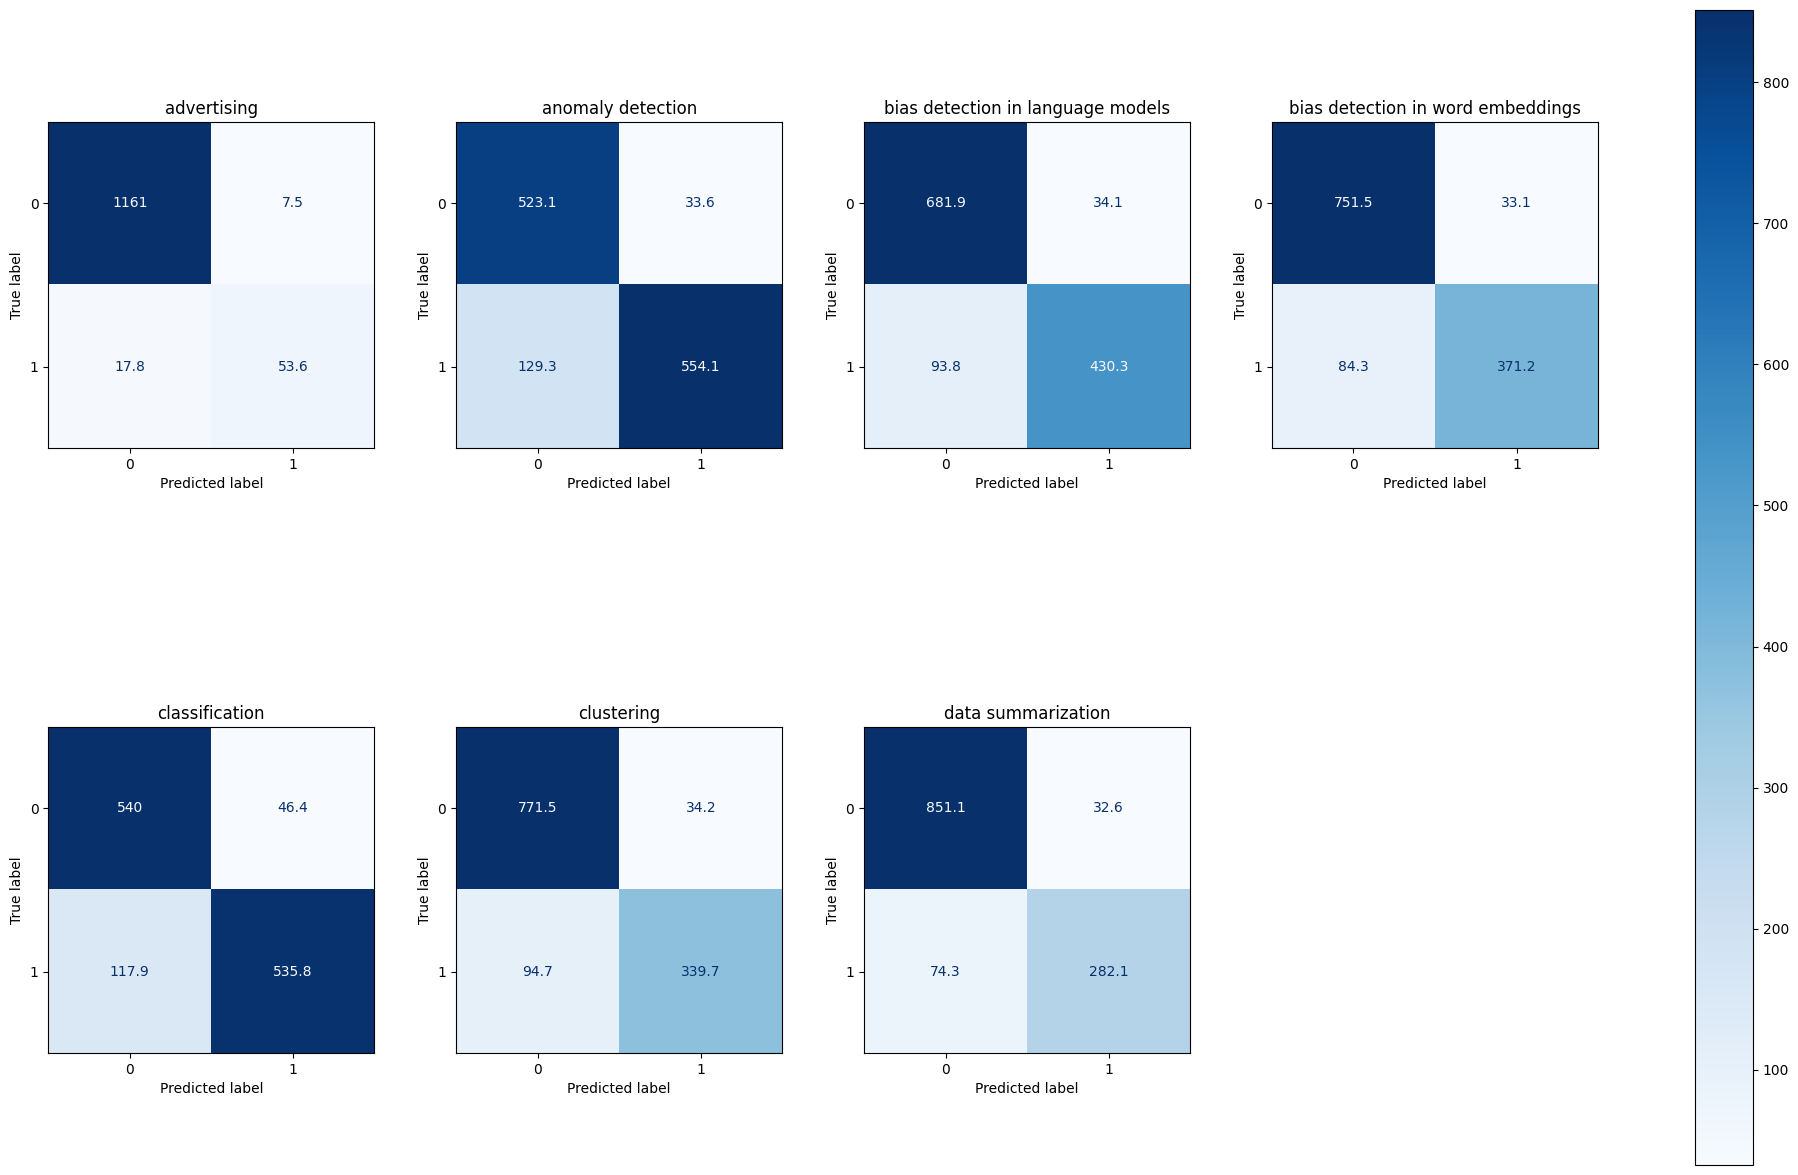

In [ ]:
model = RandomForestClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 2/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 3/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 4/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 5/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 6/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 7/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 8/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 9/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 10/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in 

Precision: 0.477653256864713
Recall Score: 0.43060839067751067
F1 Score: 0.4528307538601605
Hamming Loss: 0.2605832465213557


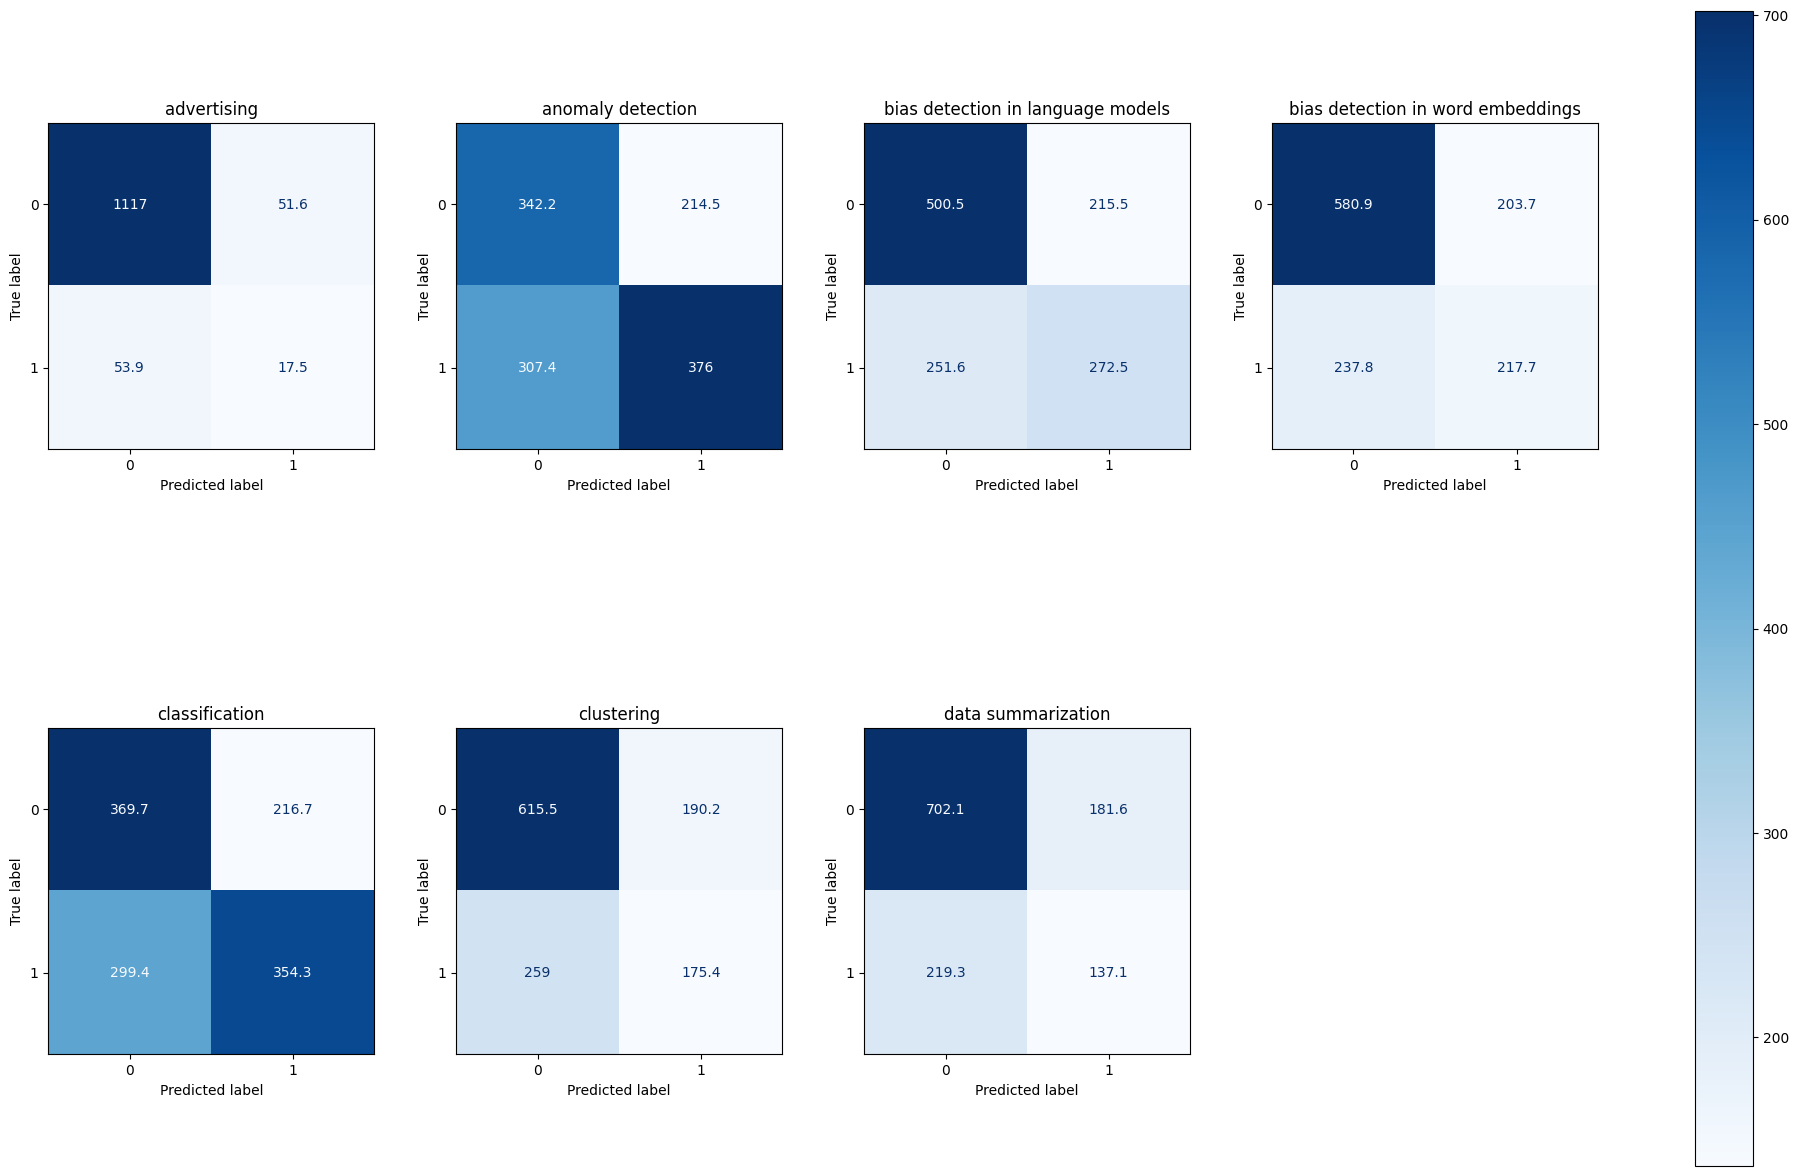

In [ ]:
model = LogisticRegression()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.34405659270692296
Recall Score: 0.4663948216573684
F1 Score: 0.395453913273598
Hamming Loss: 0.3555851035645231


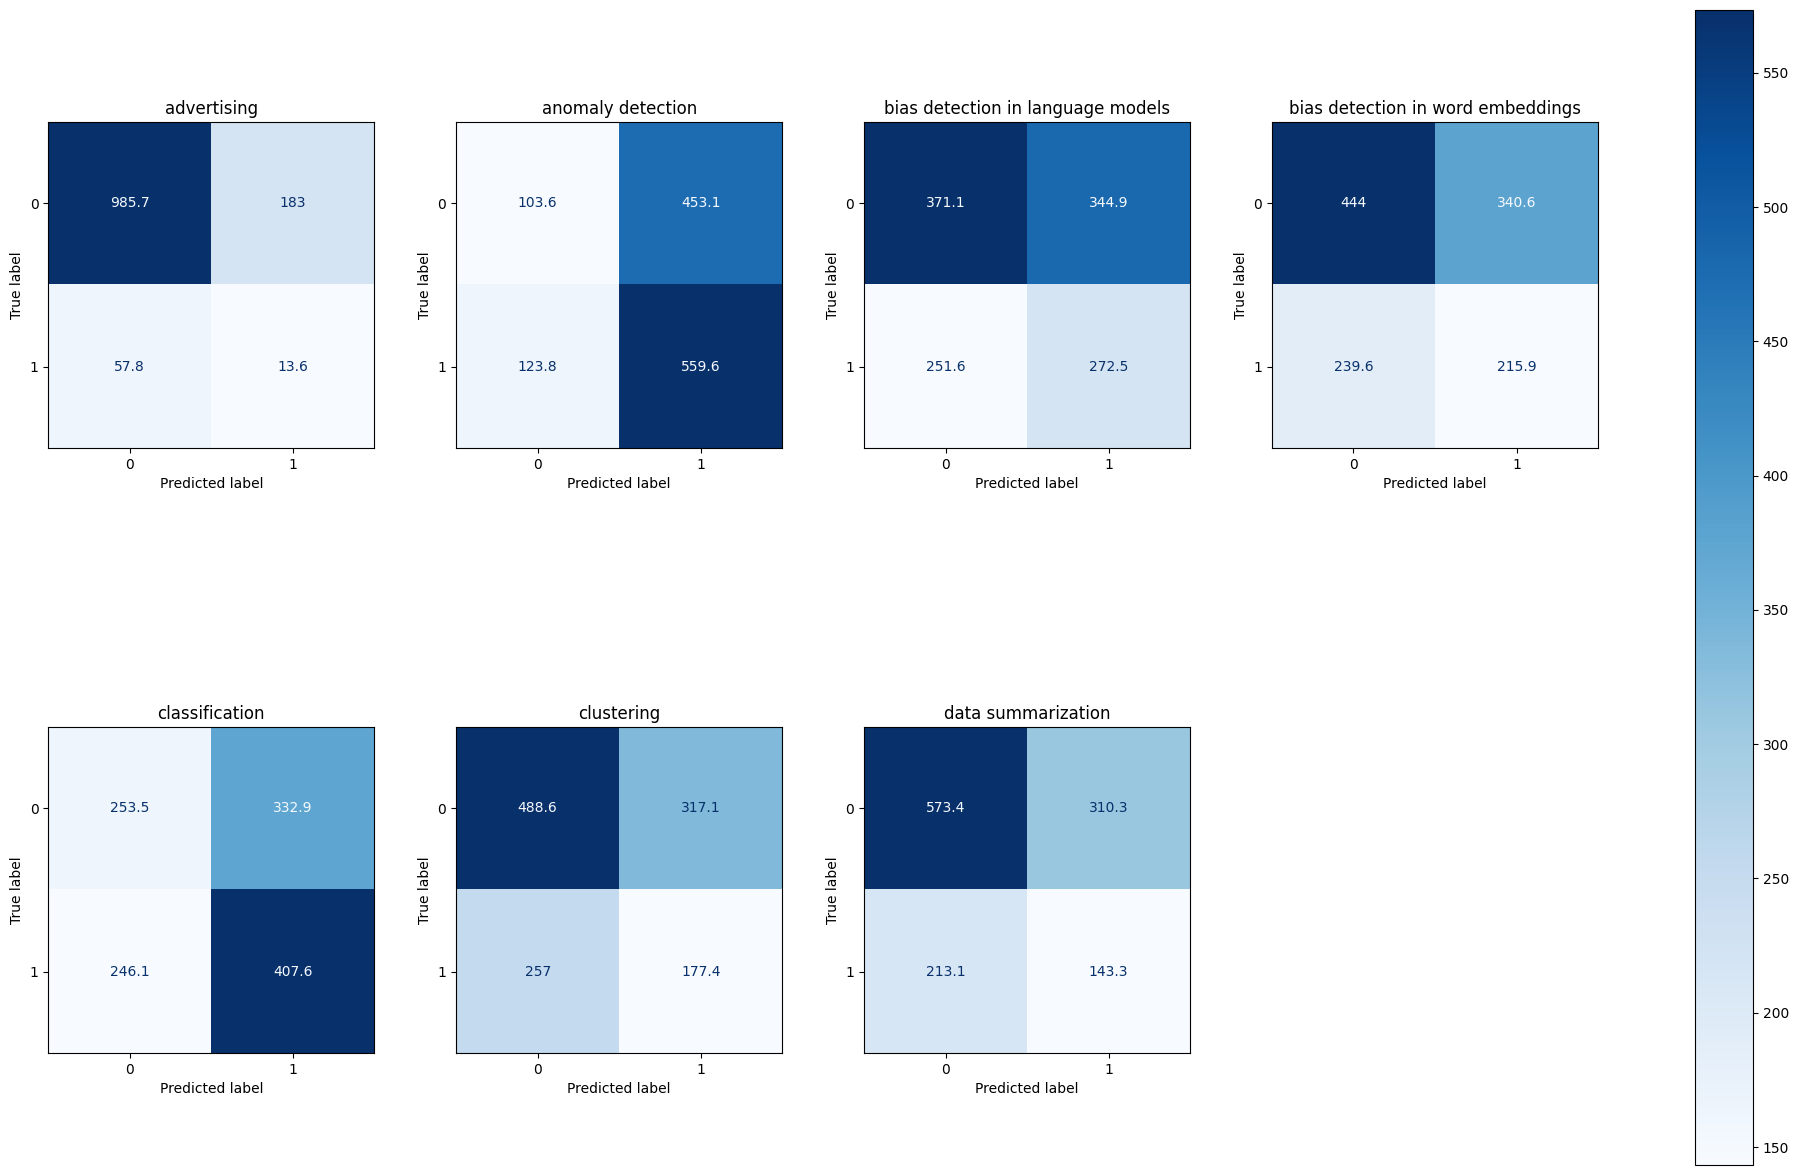

In [ ]:
model = GaussianNB()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.6371920024827759
Recall Score: 0.4814404662650162
F1 Score: 0.5483336572576475
Hamming Loss: 0.19854430310143706


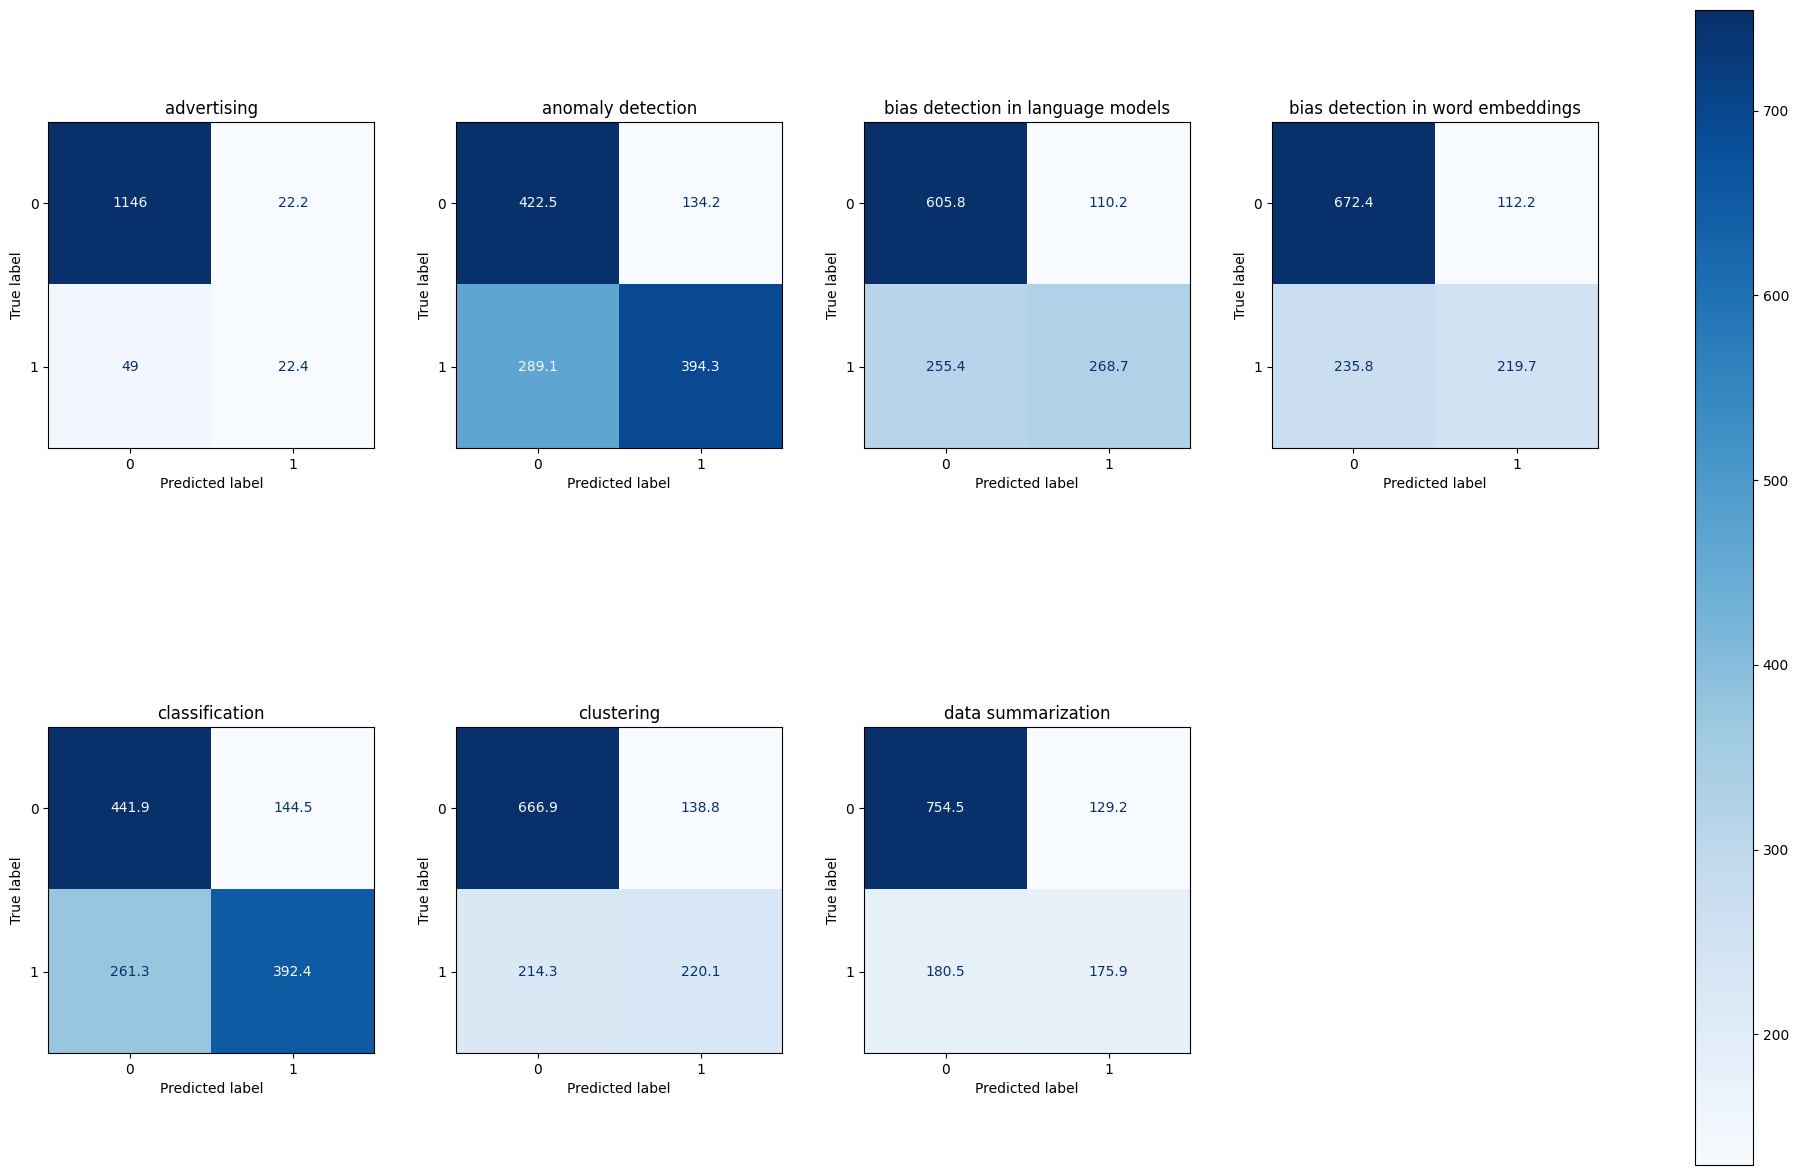

In [ ]:
model = KNeighborsClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-9-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!


Precision: 0.8606583735210334
Recall Score: 0.8586951376518914
F1 Score: 0.8596150221180435
Hamming Loss: 0.07024904873401142


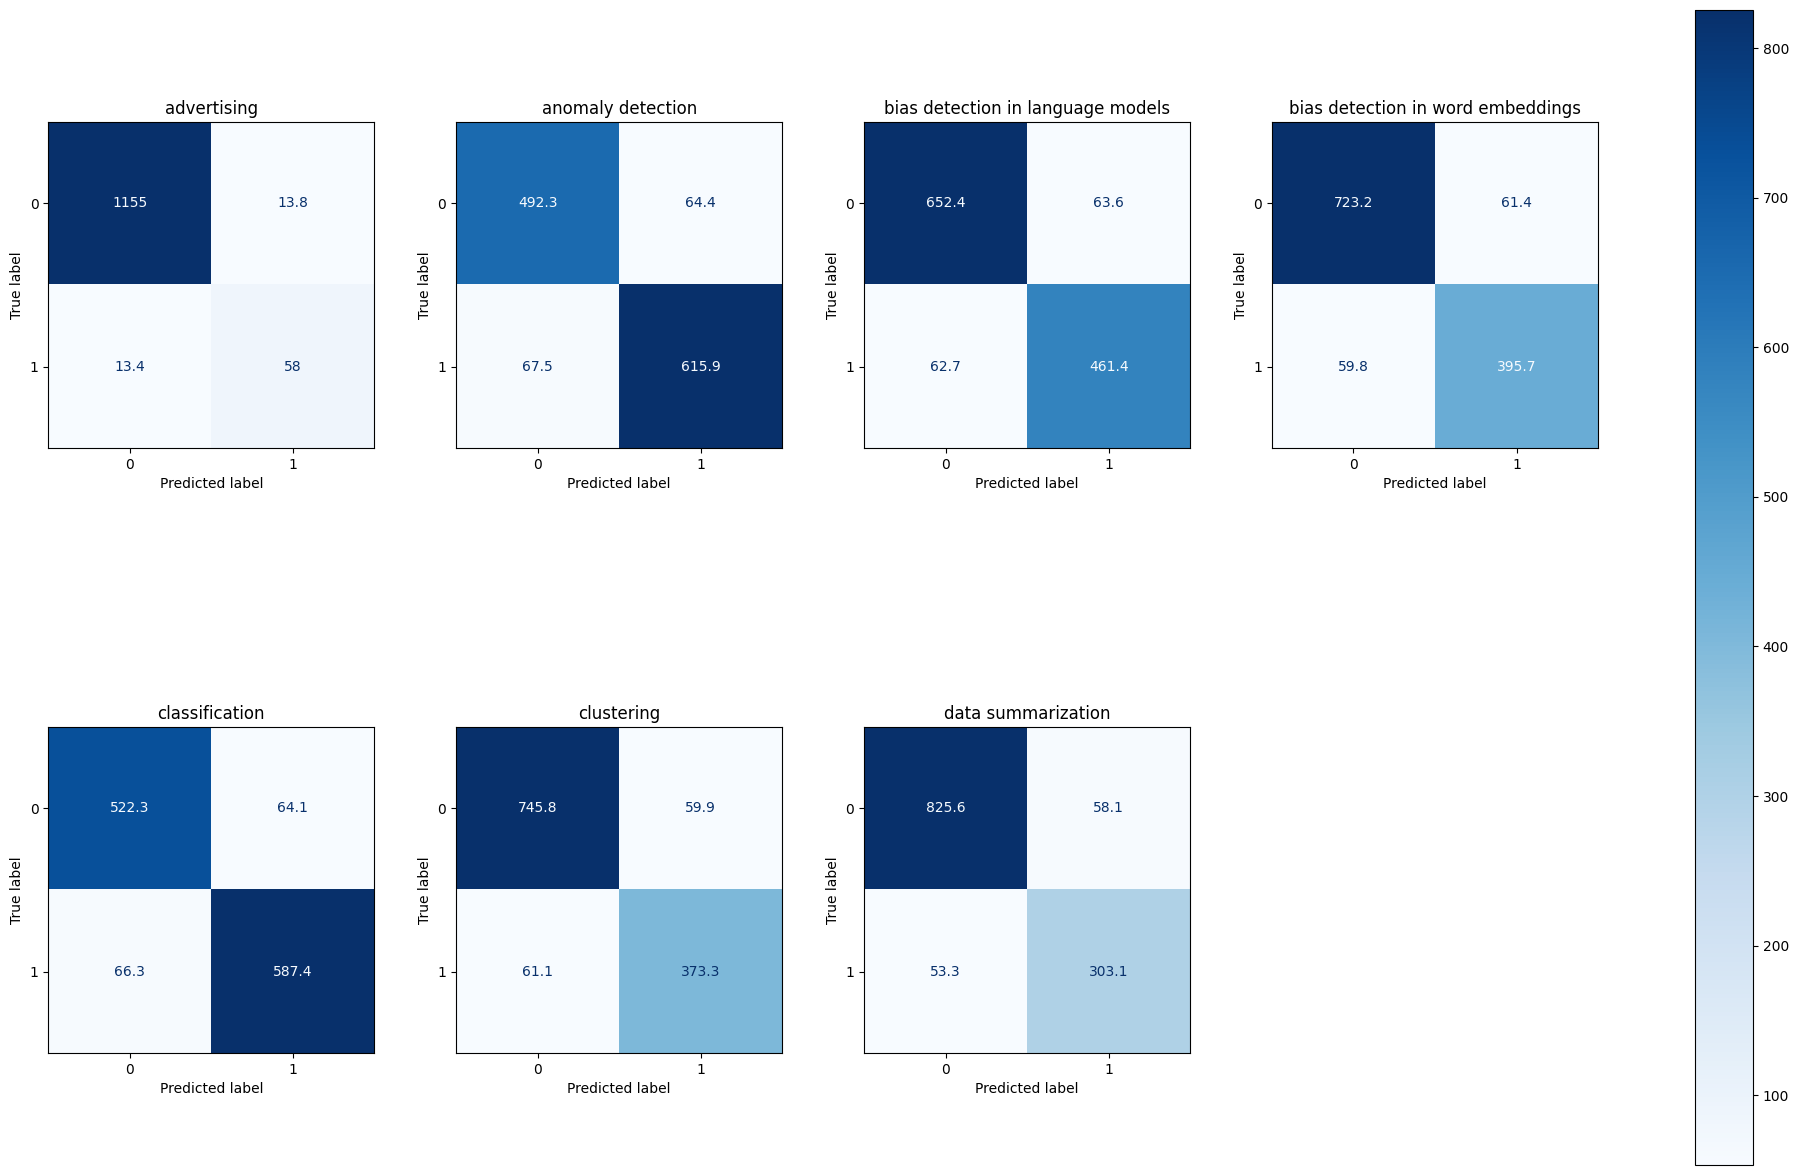

In [ ]:
model = DecisionTreeClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 2/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 3/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 4/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 5/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 6/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 7/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 8/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 9/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training on fold 10/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-9-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

Precision: 0.4641066059941374
Recall Score: 0.39115007994096385
F1 Score: 0.4244330136725642
Hamming Loss: 0.2656952239749022


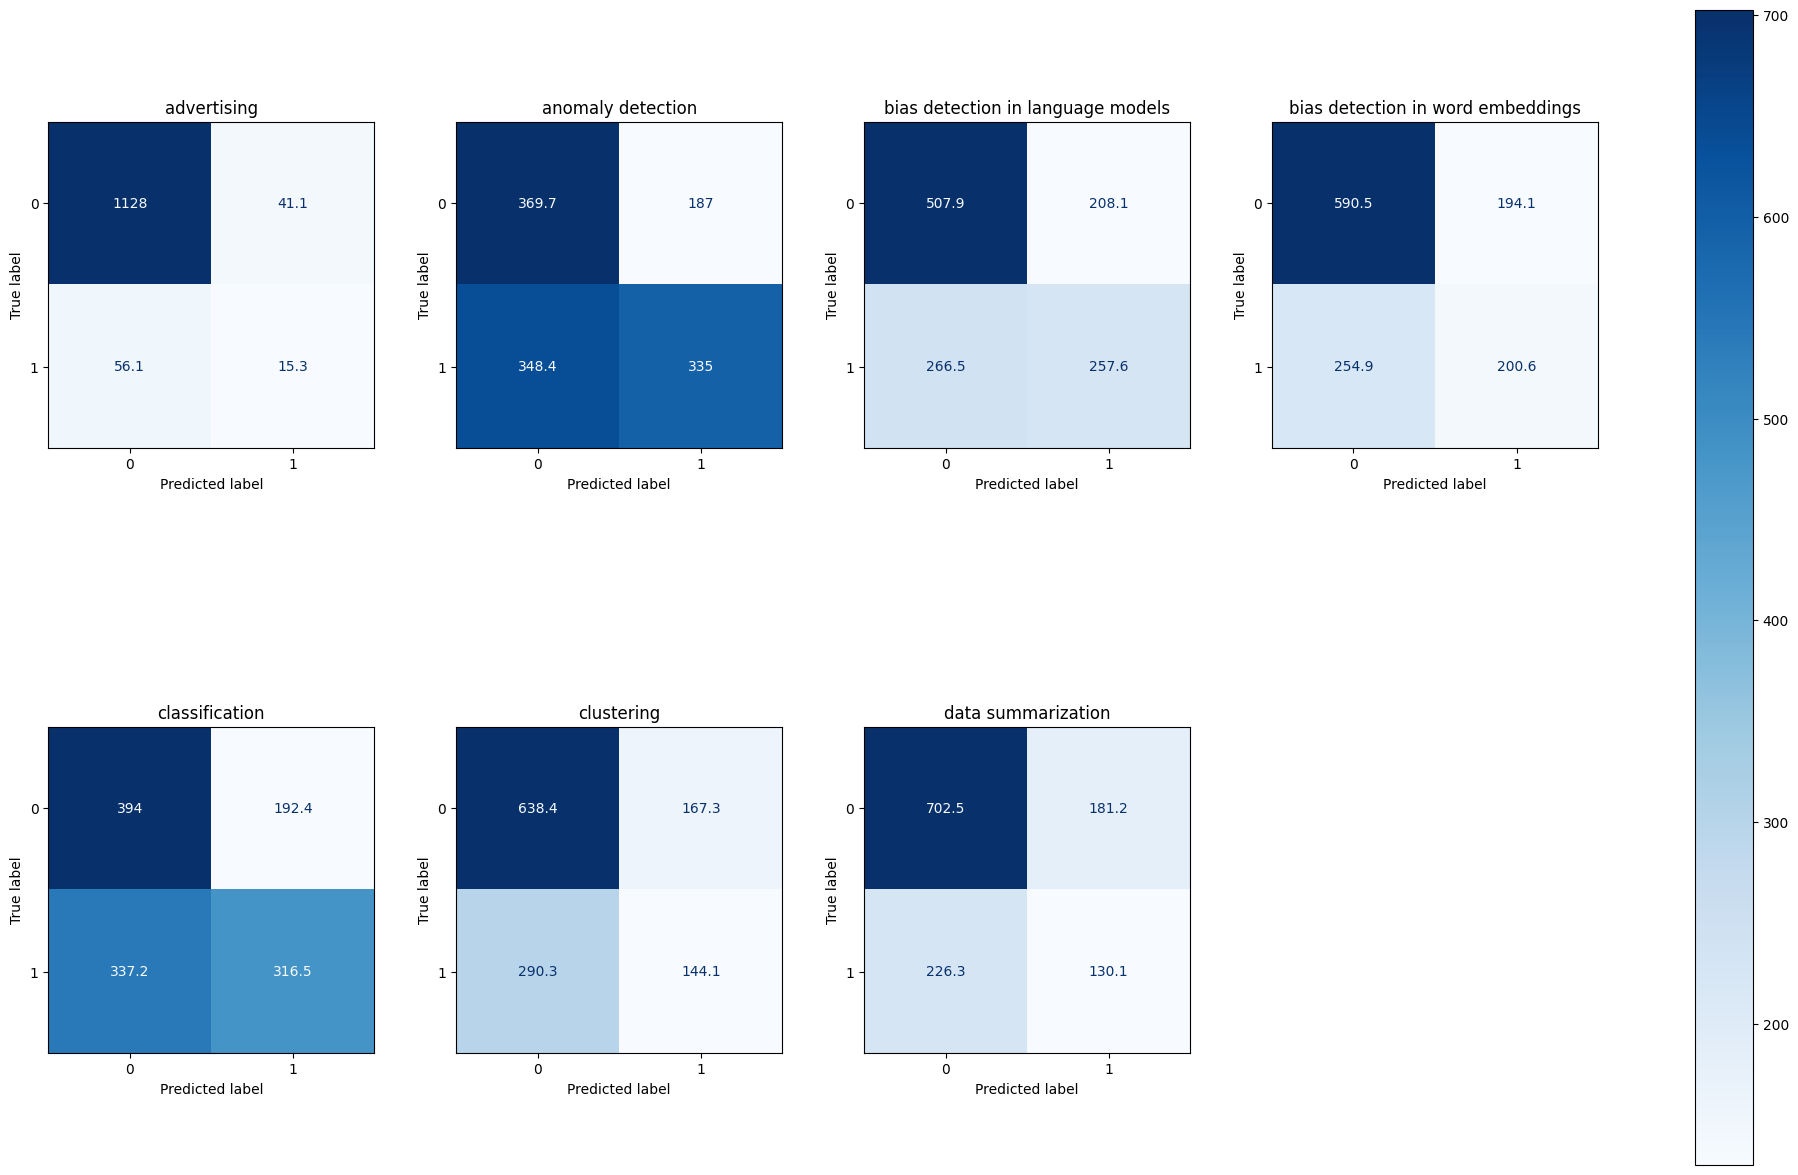

In [ ]:
model = LinearSVC()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))